# Perform a looping with the quadrotor

# Goal of the project

The goal of this project is to control a 2D quadrotor to get it to perform acrobatic moves. The controller will be designed using an SQP solver.

Please submit your code as a runnable Jupyter Notebook.

## 2D quadrotor

The quadrotor is depicted in the following figure
<img src='quadrotor.png' width="300">


The quadrotor model is written as
$$\begin{align}
\dot{p_x} &= v_x\\
m \dot{v}_x &= - (u_1 + u_2) \sin \theta \\
\dot{p_y} &= v_y\\
m \dot{v}_y &= (u_1 + u_2) \cos \theta  - m g\\
\dot{\theta} &= \omega\\
I \dot{\omega} &= r (u_1 - u_2) \end{align}$$
where $p_x$ is the horizontal and $p_y$ the vertical positions of the quadrotor and $\theta$ is its orientation with respect to the horizontal plane. $v_x$ and $v_y$ are the linear velocities and $\omega$ is the angular velocity of the robot. $u_1$ and $u_2$ are the forces produced by the rotors (our control inputs). $m$ is the quadrotor mass, $I$ its moment of inertia (a scalar), $r$ is the distance from the center of the robot frame to the propellers and $g$ is the gravity constant. To denote the entire state, we will write $x = [p_x, v_x, p_y, v_y, \theta, \omega]^T$ - we will also write $u = [u_1, u_2]^T$.

The module ```quadrotor.py``` defines the problem and provides all the useful information about the robot and methods to simulate and animate it as shown below.

You can access the different parameters of the model in the following way:

In [1]:
# Quadrotor import and it's paramenetrs display
import quadrotor

print("Mass    =", quadrotor.MASS)
print("Length  =", quadrotor.LENGTH)
print("Inertia =", quadrotor.INERTIA)
print("Dt      =", quadrotor.DT)
print("state size   =", quadrotor.DIM_STATE)
print("control size =", quadrotor.DIM_CONTROL)

Mass    = 0.5
Length  = 0.15
Inertia = 0.1
Dt      = 0.04
state size   = 6
control size = 2


## Part 1 - Setting up the trajectory Optimization (50 points)
1. Discretize the system dynamics using the Euler method seen in class - write the time discretization step as $\Delta t$ (use symbols not numbers for the mass, etc)
2. We would like the quadrotor to perfom a looping. Find and implement a suitable cost function to perform a looping and add constraint to maintain the thrust of each rotor between $0$ and $10$. Solve the problem using your own implementation of a SQP (levarging your code from Homework 2) with a large horizon to check that you can do a looping.
3. Show plots of all the states and controls of the robot as a function of time. Describe your design choices (in a concise manner) in the report.

## Part 2 - Model predictive control (MPC) (50 points)
1. Use the trajectory optimization method from Part I to design a MPC controller and test it using the simulator below. In particular, verify that it can handle perturbations by calling the ```quadrotor.simulate``` function with ```disturbance = True``` (when setting disturbance to True, the simulator will generate a random perturbation every 1 second). Simulate your controller for 10 seconds, plot the state anc control evolution.
2. Explain your intended design in the report, including the cost function and found control law

The ```quadrotor.simulate``` function takes as an input an initial state, a controller, the number of discrete time steps and a boolean value to indicate the presence of perturbation. The controller has to be a function taking as an input a state and time index and outputting a control vector.

To visualize the trajectory, use the ```quadrotor.animate_robot``` function
and show the animation (show the plots in your report).

## Bonus (10 points)
Add a state constraint to perform the looping while maintening a positive altitude. Use the origin as an initial state.

In [2]:
# Importing libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import IPython

# Starter code given
def controller(x, t):
    return np.zeros(2)

x_init = np.array([0, 0, 0., 0 ,0, 0])
horizon_length = 100
t, state, u = quadrotor.simulate(x_init, controller, horizon_length, disturbance=True)
quadrotor.animate_robot(state, u)

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAMphtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EPpliIQAN//+9vD+BTY7mNCXEc3onTMfvxW4ujQ3vc4AAAMAAAMAAAMAADSY0H4zd2rDhiAAAAMA
JgAGCANgAzAEdwBJhifrPwALwRFkBJwPzJUmFGT2qHXo4m6RCitIlhRYet3pioe7PtHMnO4JkntJ
ujXVK9mpvpov1Dq5CrLp26+E/qiy2XJ1DXbFQFIeD6dj4d/Ycg4MlRjSj5F/jO4dneZbKchBkxER
1+dwaLseoQTUOIHe+AjMd/01j3lkHunyumHGATF5QfuGMNEhmAiiUAYOIeHxFiIgg2yx/sREsJlD
kHggnz8ibjDHy6sod15ejTD7nM3nSKn356x7NU+rLjiy+TGV7zlKZBPivMIavE++a9A0lqsJYdgr
ySjKMHT/BXnDAgmDXfO64jpiyGPFAqtkFWJ5TEQleZ1J5ApIiAbrmqAKw3p8+/i/wJs8O+8pdk8P
HVf783TzYB8jTD3e0Hrvk+m9yV30qkBMD1Yt4BTv0v5PnW3SFFwb09VLJ9/bXt1O+1kRJX5xMW1e
bcxaI7p3o1o16zYnHIiBryP8xbcKoEheOGQta91Jwpm+DwxVqqu9he48e1d2jH7aO0yXqsT2b/qz
7oLLlMh42Npded9tcQEhFDRNo5nfOSlKKeMLR8VskNKSA1Xup+D3KKP/Ucrk7dfblkrlCV0OT9R8
e1VeUJLnSiEnVqg5IfgEg1c+fw2G5gVw6gXCXLWJHWwLr7Zv9ubJ4/o4TKWpJu/d/99C6V3hQlL2
dlAntVuqdmAD3B0j6kW79UlFofjws1/8vyTk5+XWigBqqZX44ebKxHmP3OL0k0UfeSfDOZ+P0xnA
MS0Nz6yx3NhjD52RCX8aAvsAWIQQMqYvxcvcTCNbnLx8piLuXeNtrcp36rh1Mqz7PhKBiVgCkoe7
AP9TFTR0BGZ/D1cdBO83QAs0kqTjhk1oWhee5U2ZsL9uQAJtUVqUGUDQIwwcLLGxs5+0/QFGLweU
0TgtmPNW+JVUaPOSvQC3VU/PM05tzUCbYISpEXUUqaoVLSK4wmSjMpDpZtrfRDtK0BeWbgnx/5c/
v1MFr5gz05/XEyuc91cZey7SxG4YeVX8e9YnsrKw/C//SEJn/qtsxSYe0ofvGKUbqnT9RCGwHjhL
hiMlwGfHRMRN4IEtwtOMiYwILRxT38KApOHuVcg9fmFcVSmkPsnjBehxiuzOwXRtPvlYkElHnGZH
MqtbQskXids0AWbYi/kN5aMbVnXsEmkPjZ1Te3xvKs4lX0OeRbLfOhB63Fv09PTr9S9aepKl1OeQ
uYtdHT8ocA3xUgn9ALzX/KIqIs204slWYN4Bk3iZVWWWZMAehvIwfCWzsMSLXQF1YdMUU58+NIQv
EFYyRQULyi9LF1URhAOwEJCFYA7w8nfgAAADAAADAAADABJDdAaZFMka1UuohmxKhZH2Yn5lK0Wz
ScL2WGjTB/ekTdy0Qj6v0Vxsxl9IRSLhPoBpp1QtNIfRstS+e+36KxRSkcYoc+pM8evwS6OIosmL
9oY3WzfFooOcbaS+tis7gOZBJGoNMrNrG9Zq+tkWfYzYmJXBZjoscfaVaV1BSzSaTbMocoHUAWQF
JEXXhfolUhDQyVbZGQukPixAGx98j2Uav2taZrsTeD7I/6nn5wjgVysY3WGqskiwB1lyam1Lb9Wh
rICpY+aGwrh0QjcIh0EsNOalG+h85u/BAa+B1fV5XUSIX3/9EN1s8QBI+6v6un6w76g56wgRo9Id
yfacTYShst0FhN1KAC5YNk6htuM6H8Kynlf8UDJpu3B5QFjBxGXYOY3/EUMBeqR9cMEFlQjc9eiN
1mncH/0pwQGf70IcTWrb/qO4pdbtPKgzmh81tu3KIIH5aoXKH2HAD5sLMzHVMqBlOLDrlZ/CDSti
YnEtIxfNraW7GNGUC3v7y7sQPkZ8wpreJ0Eq3ccJPIFOrT/PDAixGtQ52+j1T+5kngtl65bkScz6
qHQA3ef3V8u/Q8Bm1dLJ0bHG/FgMwWLEdftVFkmN6mFQo7lMH/0bY86B7Ht7/rXT8gRsYp1bkTYw
9bQlPlHJTQc8ggcaw2X7KqJ9CcTxGut/gSsOg/+QV4DeQ44W9PIQTBZEkxG+3MoDgrrVSzxNsgKO
tYJL3Aq/oqFtS+aQZxflN2PEIV0C6MJRTc/psTiY75sufZdmMFsP1DyVnDVqsI+G6mgK22f5YfjI
SFWrLjeabdpqeUd9H5vOPm6eoxMJC2qOpoLoE6bKMj2bpARCIOk9NyTnnn8DtlvyL49yQiJFlej+
P5fgootgZSeUSggZh7oyYUiAQZgxyRAY8oyQUepEy+RElC67PIV7ezplU/0nus4Ps45CgyzcD4g2
0sZSvVUHNKHFzQl2xfc6E5AADGJo8uBlZM9wCZSU4/JtX7o121+mAylYa5+vMTjjTM8vcSuUWKVL
hYYMqUsRf8FGP+YFLPqAyxhNs69USSOJugmDQz8kiXZDoCDVBPPjs3AQ7RBhp5SPIUbEKimEW42H
CQEMfO/0QIBQEJDJd5HiJP/00oGIFeATJig4HBd72QJgLGHlMjcwAAADAAAMCT5d3ClgSxoY1aUD
bm6MeIhtXClUmwS7chnC4K5rWTBG4+vurFmCS7BBMfXu0gUc4WZ32Di27gufKYW2Oyw3Bsxthoxh
F9CkN2F5nelFA1aNEWDN71Sqvhhw/gjzWjToXPJ/XMXceSVwcbCzsOzadubsMNcPXTfj9AJ07Jzq
BAgwR94zgtlmNgc+KFC84OoXrYkR8+LklzPIrSjCH/YyHaCA4w8rpzNT8hRN5ozzmstDb+6dQ4dc
hiFKjr3kiAHm509l6JNz/kBRFD3IWgMN3wqMu806FeAr7KpYJLl7ONxjZwGHBz7CzZ6zZF22nvhA
5IvZDO+hc5h75tH7MHuiX

# Part 1 - Setting up the trajectory optimization

In [3]:
# Installing necessary libraries if not available
!pip install cvxopt

# Importing other essential necessary libraries
import cvxopt
from cvxopt import matrix, solvers
from scipy.sparse import lil_matrix

In [4]:
# Quadrotor parameters
MASS = quadrotor.MASS          # 0.5 kg
LENGTH = quadrotor.LENGTH      # 0.15 m
INERTIA = quadrotor.INERTIA    # 0.1 kg m^2
DT = quadrotor.DT              # 0.04 s
G = 9.81                       # Gravity constant
NX = quadrotor.DIM_STATE       # Number of states
NU = quadrotor.DIM_CONTROL     # Number of control inputs

In [5]:
# Declaring trajectory parameters
DURATION = 10.0
N = 250
num_states = (N + 1) * NX
num_controls = (N ) * NU
num_vars = num_states + num_controls

# Declaring target trajectory
t = np.linspace(0, DURATION, N + 1)
radius = 1.25
angular_speed = 2 * np.pi / DURATION

# Computing target positions & velocities
px_target = radius * np.cos(angular_speed * t)
py_target = radius * np.sin(angular_speed * t)
vx_target = np.gradient(px_target, DT)
vy_target = np.gradient(py_target, DT)
# Computing desired accelerations
ax_target = -radius * (angular_speed**2) * np.cos(angular_speed * t)
ay_target = -radius * (angular_speed**2) * np.sin(angular_speed * t)

# Computing desired pitch angle
theta_target = - np.arctan2(ax_target, ay_target + G)
omega_target = np.gradient(theta_target, DT)
# Declaring cost weights
q_p, q_v, q_theta, q_omega = 100.0, 1.0, 10.0, 10.0
r_u = 1.0

In [6]:
### Initializing Function ###
def initialize_trajectory():
    z = np.zeros(num_vars)

    # Hovering thrust for both rotors
    hover_thrust = MASS * G / 2
    for k in range(N + 1):
        idx_uk = k * (NX + NU) + NX
        z[idx_uk:idx_uk + NU] = hover_thrust

    # Initializing state trajectory 
    for k in range(N + 1):
        idx_xk = k * (NX + NU)
        z[idx_xk] = px_target[k]  # p_x
        z[idx_xk + 2] = py_target[k]  # p_y
        z[idx_xk + 4] = theta_target[k]  # theta
        z[idx_xk + 1] = vx_target[k]  # v_x
        z[idx_xk + 3] = vy_target[k]  # v_y
        z[idx_xk + 4] = omega_target[k]  #omega
    return z

In [7]:
### Cost Function ###
def compute_cost(z, Q):
    J = 0.0  # Initializing total cost
    R = r_u * np.eye(NU)  # Control effort penalty weights

    # Penalizing state deviations from target trajectory
    for k in range(N):
        idx_xk = k * (NX + NU)  # Index -> k-th state in z
        x_k = z[idx_xk:idx_xk + NX]  # Extracting current state variables
        x_t = np.array([
            px_target[k],  # Target x position
            vx_target[k],  # Target x velocity
            py_target[k],  # Target y position
            vy_target[k],  # Target y velocity
            theta_target[k],  # Target orientation
            omega_target[k]   # Target angular velocity
        ])
        # Quadratic cost for state deviation from the target
        J += 0.5 * (x_k - x_t).T @ Q @ (x_k - x_t)

    # Penalizing control effort
    for k in range(N):
        idx_uk = k * (NX + NU) + NX  # Index -> k-th control input in z
        u_k = z[idx_uk:idx_uk + NU]  # Extracting current control inputs
        # Quadratic cost for control input
        J += 0.5 * u_k.T @ R @ u_k

    return J

In [8]:
### Cost Gradient Function ###
def compute_cost_gradient(z, Q):
    grad = np.zeros_like(z)  # Initializing gradient vector
    R = r_u * np.eye(NU)  # Control effort penalty weights

    # Computing gradient for states and controls over the time horizon
    for k in range(N):
        # State variables gradient
        idx_xk = k * (NX + NU)
        x_k = z[idx_xk:idx_xk + NX]
        x_t = np.array([px_target[k], vx_target[k], py_target[k], vy_target[k], theta_target[k], omega_target[k]])
        grad[idx_xk:idx_xk + NX] = Q @ (x_k - x_t)  # Gradient w.r.t. state deviation
    for k in range(N):
        # Control variables gradient
        idx_uk = k*(NX+NU) + NX
        u_k = z[idx_uk:idx_uk + NU]
        grad[idx_uk:idx_uk + NU] = R @ u_k  # Gradient w.r.t. control effort

    return grad

In [9]:
### Cost Hessian Function ###
def compute_cost_hessian(z, Q):
    H = np.zeros((num_vars, num_vars))  # Initializing Hessian matrix
    R = r_u * np.eye(NU)  # Control effort penalty weights

    # Computing Hessian for states and controls
    for k in range(N + 1):
        idx_xk = k * (NX + NU)
        H[idx_xk:idx_xk + NX, idx_xk:idx_xk + NX] = Q  # for state variables
    for k in range(N):
        idx_uk = k*(NX+NU) + NX
        H[idx_uk:idx_uk + NU, idx_uk:idx_uk + NU] = R  # for control variables

    return H

In [10]:
### Dynamics Constraints Function ###
def compute_constraints(z):
    c = np.zeros((N) * NX)  # Initializing constraint vector

    # Loop over time steps in computing dynamics constraints
    for k in range(N):
        idx_xk = k * (NX + NU) # Indices -> current and next state
        idx_uk = idx_xk + NX  # Index -> control input
        x_k = z[k*(NX + NU):k*(NX + NU) + NX] # Current and next states
        if k < N :
            x_kp1 = z[(k + 1)*(NX+NU):(k+1)*(NX+NU) + NX]
        else:
            x_kp1 = np.array([0, 0, 0, 0, 0, 0])

        u_k = z[idx_uk:idx_uk + NU]  # Control input at time step k

        # Computing system dynamics
        f_k = np.zeros(NX)
        f_k[0] = x_k[1]  # dx/dt = velocity
        f_k[1] = -(u_k[0] + u_k[1]) * np.sin(x_k[4]) / MASS  # dv_x/dt
        f_k[2] = x_k[3]  # dy/dt = velocity
        f_k[3] = (u_k[0] + u_k[1]) * np.cos(x_k[4]) / MASS - G  # dv_y/dt
        f_k[4] = x_k[5]  # dtheta/dt = angular velocity
        f_k[5] = LENGTH * (u_k[0] - u_k[1]) / INERTIA  # domega/dt

        # Constraints
        c[k * NX:(k + 1) * NX] = - x_kp1 + x_k + DT * f_k

    return c

In [11]:
### Dynamics Constraints Jacobian Function ###
def compute_constraints_jacobian(z):
    num_constraints = (N) * NX
    G = lil_matrix((num_constraints, num_vars))

    for k in range(N):
        idx_xk = k * (NX + NU)
        idx_uk =  idx_xk + NX

        x_k = z[idx_xk:idx_xk+NX]
        u_k = z[idx_uk:idx_uk+NU]

        theta_k = x_k[4]
        u1_k = u_k[0]
        u2_k = u_k[1]

        # Compute partial derivatives of f_k w.r.t x_k and u_k
        df_dx = np.zeros((NX, NX))
        df_du = np.zeros((NX, NU))

        #partial derivatives w.r.t x
        df_dx[0, 0] = 1
        df_dx[0, 1] = DT
        df_dx[1,1] = 1
        df_dx[1, 4] = (- (u1_k + u2_k) * np.cos(theta_k) / MASS) *DT
        df_dx[2, 2] = 1
        df_dx[2, 3] = DT
        df_dx[3, 3] = 1
        df_dx[3, 4] = (- (u1_k + u2_k) * np.sin(theta_k) / MASS) * DT
        df_dx[4, 4] = 1
        df_dx[4, 5] = DT
        df_dx[5, 5] = 1
        #partial derivatives w.r.t u
        df_du[1, 0] = (- np.sin(theta_k) / MASS) *DT
        df_du[1, 1] = (- np.sin(theta_k) / MASS)*DT
        df_du[3, 0] = (np.cos(theta_k) / MASS)*DT
        df_du[3, 1] = (np.cos(theta_k) / MASS)*DT
        df_du[5, 0] = (LENGTH / INERTIA)*DT
        df_du[5, 1] = (- LENGTH / INERTIA)*DT

        # Building Jacobian

        G[k*(NX):(k+1)*NX ,(k+1)*(NX+NU):(k+1)*(NX+NU)+NX] = -np.eye(NX)

        # Partial derivatives of c_k w.r.t x_k
        G[k*NX:(k+1)*NX, k*(NX+NU):k*(NX+NU)+NX] =  df_dx

        # Partial derivatives of c_k w.r.t u_k
        G[k*NX:(k+1)*NX, k*(NX+NU)+NX: k*(NX+NU)+NX+NU] =  df_du

    return G.tocsc()

In [12]:
### Inequality Constraints & Jacobian Functions ###
# Computing inequality constraints
def compute_inequality_constraints(z):
    h = np.zeros(2 * (N) * NU)  # Upper and lower bounds for each control
    for k in range(N):
        idx_uk =  k * (NX + NU) + NX
        u_k = z[idx_uk:idx_uk + NU]
        # u_k constraints: u_k <= 10 and u_k >= 0
        h[4 * k] = u_k[0]- 10.0        # u1_k <= 10
        h[4 * k + 1] = -u_k[0]      # u1_k >= 0
        h[4 * k + 2] = u_k[1]-10.0    # u2_k <= 10
        h[4 * k + 3] = -u_k[1]      # u2_k >= 0
    return h

# Computing Jacobian of inequality constraints
def compute_inequality_constraints_jacobian(z):
    G_ineq = lil_matrix((4 * (N), num_vars))  # Sparse Jacobian matrix
    for k in range(N):
        idx_uk =  k * (NX + NU) + NX
        # u1_k constraints
        G_ineq[4 * k, idx_uk] = 1.0          # u1_k <= 10
        G_ineq[4 * k + 1, idx_uk] = -1.0     # u1_k >= 0
        # u2_k constraints
        G_ineq[4 * k + 2, idx_uk + 1] = 1.0  # u2_k <= 10
        G_ineq[4 * k + 3, idx_uk + 1] = -1.0 # u2_k >= 0
    return G_ineq.tocsc()

In [13]:
# Suppressing progress output
solvers.options['show_progress'] = False

### SQP Solver Function ###
def sqp_solver(z0):
    z = z0.copy()
    max_iter = 200
    tol = 1e-2
    alpha_min = 1e-8
    rho = 0.75
    c_merit = 0.9
    reg_factor = 1e-5
    f_best = np.inf
    c_best = np.inf

    lambda_guess = np.zeros((N)*NX)  # Initializing Lagrange multipliers
    mu_guess = np.zeros(2 * (N) * NU)  # Initializing multipliers for inequality constraints
    lambda_guess_new = np.zeros((N) * NX)
    mu_guess_new = np.zeros((2*(N) * NU))
    Q = np.diag([100.0, 1.0, 100.0, 1.0, 10.0, 10.0])
    for it in range(max_iter):
        # Computing cost, gradient, and Hessian
        J = compute_cost(z, Q)
        grad_J = compute_cost_gradient(z, Q)
        H = compute_cost_hessian(z, Q)

        # Computing constraints and Jacobians
        c = compute_constraints(z)
        G = compute_constraints_jacobian(z).toarray()

        # Computing inequality constraints and Jacobians
        h = compute_inequality_constraints(z)
        G_ineq = compute_inequality_constraints_jacobian(z).toarray()

        # QP problem matrices
        P = cvxopt.matrix(0.5 * (H + H.T) + reg_factor * np.eye(num_vars))  # Ensure positive-definite Hessian and system stability
        q = cvxopt.matrix(grad_J)
        Aeq = cvxopt.matrix(G)
        beq = cvxopt.matrix(-c)
        G_qp = cvxopt.matrix(G_ineq)
        h_qp = cvxopt.matrix(-h)

        # Solve QP
        try:
            sol = solvers.qp(P, q, G_qp, h_qp, Aeq, beq)
            p = np.array(sol['x']).flatten()
            p_lambda = np.array(sol['y']).flatten()
            p_mu = np.array(sol['z']).flatten()
            if p is None:
                print(f"QP solver failed at iteration {it + 1}")
                break
        except Exception as e:
            print(f"QP solver encountered an error at iteration {it + 1}: {e}")
            break

        # Line search with merit function to find an appropriate step size alpha
        alpha = 1.0

        while True:
            z_candidate = z + alpha * p
            J_new = compute_cost(z_candidate, Q)
            c_new = compute_constraints(z_candidate)

            # Computing inequality constraints for z
            u = np.zeros((N, NU))
            for k in range(N):
                idx_uk = k * (NX + NU) + NX
                u[k, :] = z[idx_uk:idx_uk + NU]
            violation_lower = np.maximum(0, -u)  # Violation of u_k >= 0
            violation_upper = np.maximum(0, u - 10)  # Violation of u_k <= 10
            violations = np.concatenate([violation_lower, violation_upper])
            total_inequality_violation = np.sum(np.abs(violations))

            total_constraint_violation = np.sum(np.abs(c)) + total_inequality_violation

            # Penalty for constraints
            penalty = 1e-2 * (np.sum(np.abs(c)))+ 1e-3 *(total_inequality_violation)

            # Computing inequality constraints for z_candidate
            u_new = np.zeros((N, NU))
            for k in range(N):
                idx_uk = k * (NX + NU) + NX
                u_new[k, :] = z_candidate[idx_uk:idx_uk + NU]
            violation_lower_new = np.maximum(0, -u_new)  # Violation of u_k >= 0
            violation_upper_new = np.maximum(0, u_new - 10)  # Violation of u_k <= 10
            violations_new = np.concatenate([violation_lower_new, violation_upper_new])
            total_inequality_violation_new = np.sum(np.abs(violations_new))
            # Computing total constraint violation
            total_constraint_violation_new = np.sum(np.abs(c_new))+ total_inequality_violation_new

            # Penalty for constraints
            penalty_new = 1e-2 * (np.sum(np.abs(c_new)))+ 1e-3 *(total_inequality_violation_new)

            # Armijo condition with merit function
            merit_function = J + penalty
            merit_function_new = J_new + penalty_new
            if merit_function_new <= merit_function + c_merit * alpha * (grad_J.T @ p - penalty):
                # Accept the step
                z = z_candidate
                lambda_guess_new = p_lambda
                mu_guess_new = p_mu
                break
            else:
                alpha *= rho  # Reduce alpha
                if alpha < alpha_min:
                    Q = np.diag([50.0, 1.0, 50.0, 1.0, 10.0, 10.0])
                    break

        # Computing optimality
        primal_optimality = np.linalg.norm(grad_J + G.T @ lambda_guess + G_ineq.T @ mu_guess)
        dual_optimality = np.linalg.norm(c)

        lambda_guess = lambda_guess_new
        mu_guess = mu_guess_new

        constraint_violation = np.linalg.norm(c) + np.linalg.norm(violations)

        # Iteration details, printing just at final iteration
        if((it + 1) % max_iter == 0):
            print("Maximum iterations Reached")
            print(f"Itr: {it + 1}, Cost: {round(J_new, 2)}, Constraint Vio.: {round(constraint_violation, 2)}, Alpha: {round(alpha, 8)}, Primal Opt.: {round(primal_optimality, 8)}, Dual Opt.: {round(dual_optimality, 8)}")

        # Checking for convergence
        if primal_optimality < tol and dual_optimality < tol:
            print(f"--- CONVERGED IN {it + 1} ITERATION(S)! ---")
            break
    return z

In [14]:
import time
# Recording how long this sqp solver is going to take
start_time = time.time()

### Run Solver ###
z_init = initialize_trajectory()
z_solution = sqp_solver(z_init)

# Stopping recording and printing duration
total_time = time.time()
total_time -= start_time
print(f"\nTOTAL DURATION: {total_time:.4f} sec")

Maximum iterations Reached
Itr: 200, Cost: 1432.62, Constraint Vio.: 0.0, Alpha: 1e-08, Primal Opt.: 0.25258947, Dual Opt.: 9.465e-05

TOTAL DURATION: 300.7182 sec


In [15]:
### Extract Results Function ###
def extract_states_controls(z):
    x = np.zeros((N + 1, NX))
    u = np.zeros((N, NU))

    for k in range(N + 1):
        idx_xk = k * (NX + NU)
        x[k, :] = z[idx_xk:idx_xk + NX]

    for k in range(N):
        idx_uk = k * (NX + NU) + NX
        u[k, :] = z[idx_uk:idx_uk + NU]

    return x, u

# Extracting results for plotting
x, u = extract_states_controls(z_solution)

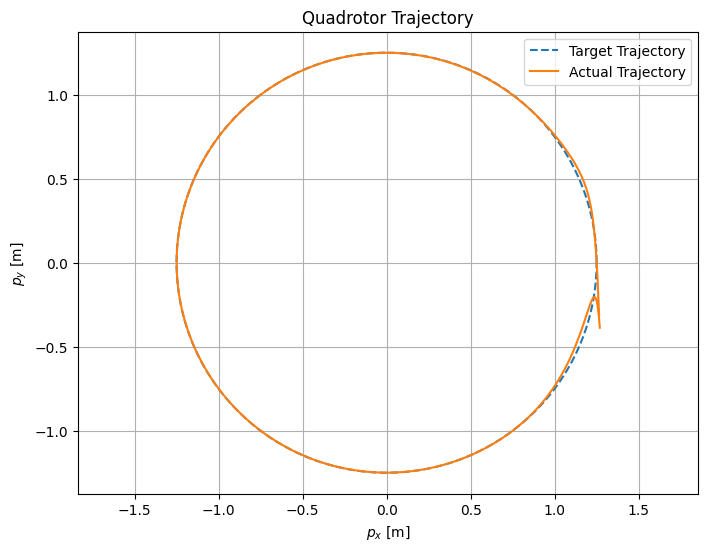

In [16]:
### Plot Results ###
# Trajectory plot
plt.figure(figsize=(8, 6))
plt.plot(px_target, py_target, label='Target Trajectory', linestyle='--')
plt.plot(x[:, 0], x[:, 2], label='Actual Trajectory')
plt.xlabel('$p_x$ [m]')
plt.ylabel('$p_y$ [m]')
plt.title('Quadrotor Trajectory')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

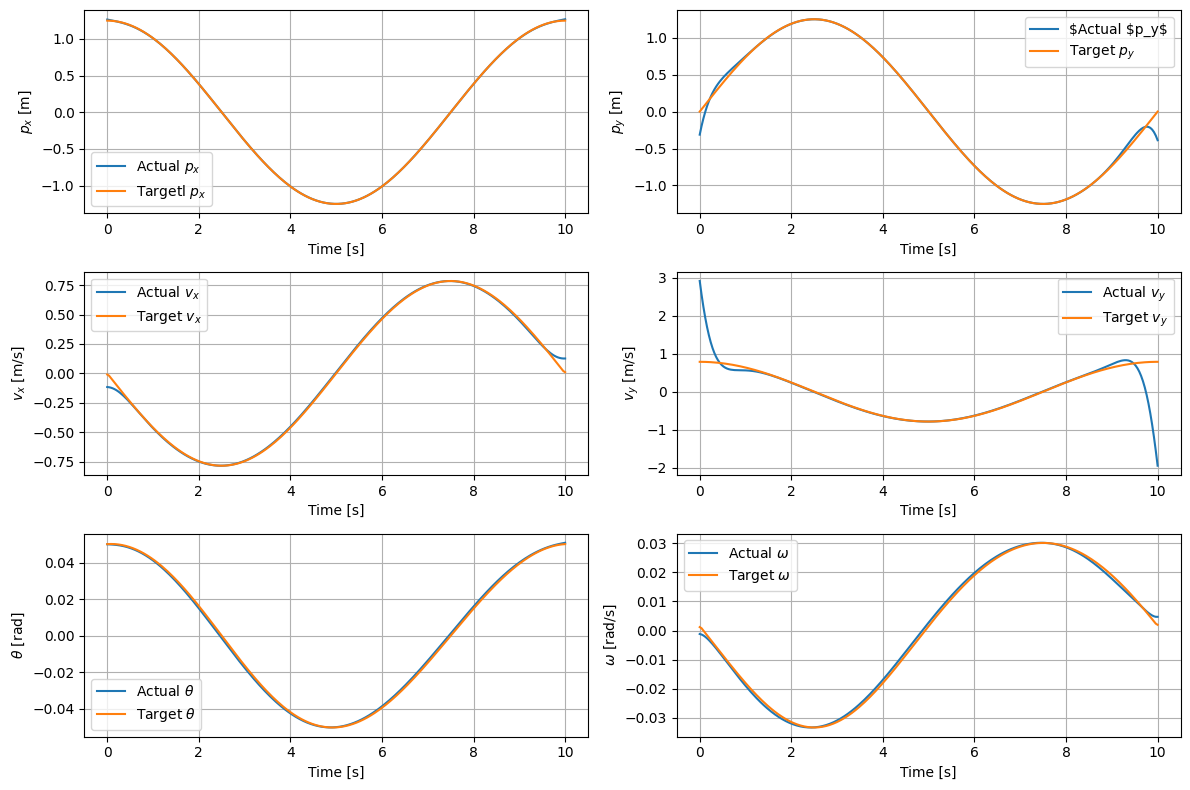

In [17]:
# Time vector
time = np.arange(N + 1) * DT

plt.figure(figsize=(12, 8))

# Position x
plt.subplot(3, 2, 1)
plt.plot(time, x[:, 0], label='Actual $p_x$')
plt.plot(time, px_target,label = 'Targetl $p_x$')
plt.xlabel('Time [s]')
plt.ylabel('$p_x$ [m]')
plt.legend()
plt.grid()

# Position y
plt.subplot(3, 2, 2)
plt.plot(time, x[:, 2], label='$Actual $p_y$')
plt.plot(time, py_target,label = 'Target $p_y$')
plt.xlabel('Time [s]')
plt.ylabel('$p_y$ [m]')
plt.legend()
plt.grid()

# Velocity x
plt.subplot(3, 2, 3)
plt.plot(time, x[:, 1], label='Actual $v_x$')
plt.plot(time, vx_target,label = 'Target $v_x$')
plt.xlabel('Time [s]')
plt.ylabel('$v_x$ [m/s]')
plt.legend()
plt.grid()

# Velocity y
plt.subplot(3, 2, 4)
plt.plot(time, x[:, 3], label='Actual $v_y$')
plt.plot(time, vy_target,label = 'Target $v_y$')
plt.xlabel('Time [s]')
plt.ylabel('$v_y$ [m/s]')
plt.legend()
plt.grid()

# Theta (orientation)
plt.subplot(3, 2, 5)
plt.plot(time, x[:, 4], label='Actual $\\theta$')
plt.plot(time, theta_target,label = 'Target $\\theta$')
plt.xlabel('Time [s]')
plt.ylabel('$\\theta$ [rad]')
plt.legend()
plt.grid()

# Omega (angular velocity)
plt.subplot(3, 2, 6)
plt.plot(time, x[:, 5], label='Actual $\\omega$')
plt.plot(time, omega_target,label = 'Target $\\omega$')
plt.xlabel('Time [s]')
plt.ylabel('$\\omega$ [rad/s]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

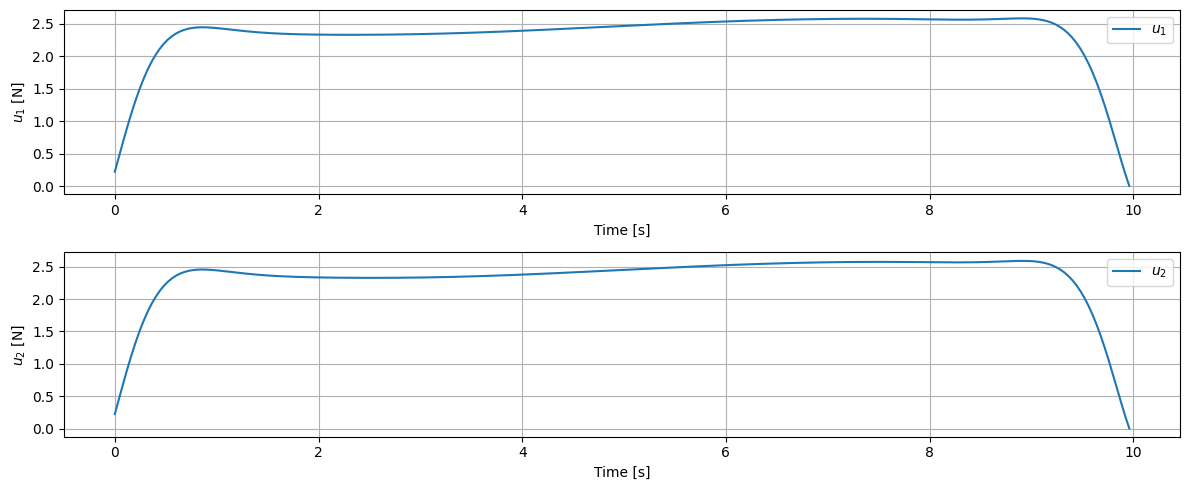

In [18]:
# Control inputs over time
time_controls = np.arange(N) * DT

plt.figure(figsize=(12, 5))

# Rotor thrust u1
plt.subplot(2, 1, 1)
plt.plot(time_controls, u[:, 0], label='$u_1$')
plt.xlabel('Time [s]')
plt.ylabel('$u_1$ [N]')
plt.legend()
plt.grid()

# Rotor thrust u2
plt.subplot(2, 1, 2)
plt.plot(time_controls, u[:, 1], label='$u_2$')
plt.xlabel('Time [s]')
plt.ylabel('$u_2$ [N]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Part 2 - Model predictive control (MPC)

In [19]:
# Import necessary libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation
import IPython
import quadrotor
import cvxopt
from cvxopt import matrix, solvers
from scipy.sparse import lil_matrix

# Quadrotor parameters
MASS = quadrotor.MASS          # 0.5 kg
LENGTH = quadrotor.LENGTH      # 0.15 m
INERTIA = quadrotor.INERTIA    # 0.1 kg m^2
DT = quadrotor.DT              # 0.04 s
G = 9.81                       # Gravity constant
NX = quadrotor.DIM_STATE       # Number of states
NU = quadrotor.DIM_CONTROL     # Number of control inputs

In [20]:
# Trajectory parameters
DURATION = 10.0
N = int(DURATION / DT)
t = np.linspace(0, DURATION, N + 1)

# Cost weights
q_px = 300      # Position weight in x-direction
q_py = 150.0    # Position weight in y-direction
q_v = 1.0       # Velocity weight
q_theta = 10.0  # Orientation weight
q_omega = 10.0  # Angular velocity weight
r_u = 1.0       # Control effort weight

# Cost weight matrices
Q = np.diag([q_px, q_v, q_py, q_v, q_theta, q_omega])
R = r_u * np.eye(NU)

# Looping trajectory parameters
radius = 1.25
angular_speed = 2 * np.pi / 10.0 

# Computing target positions & velocities
px_target = radius * np.cos(angular_speed * t)
py_target = radius * np.sin(angular_speed * t)
vx_target = np.gradient(px_target, DT)
vy_target = np.gradient(py_target, DT)
# Computing desired accelerations
ax_target = -radius * (angular_speed**2) * np.cos(angular_speed * t)
ay_target = -radius * (angular_speed**2) * np.sin(angular_speed * t)

# Computing desired pitch angle
theta_target = -np.arctan2(ax_target, ay_target + G)
omega_target = np.gradient(theta_target, DT)
# Suppressing progress output from cvxopt
solvers.options['show_progress'] = False

In [21]:
### MPC Controller Function ###
def mpc_controller(x_current, t_current):
    # If t_current >= N, return hover control
    if t_current >= N:
        hover_thrust = MASS * G / 2
        return np.array([hover_thrust, hover_thrust])

    # Prediction horizon
    N_p = 40
    N_p = min(N_p, N - t_current)

    num_vars = N_p * (NX + NU) + NX  # States and controls

    z0 = np.zeros(num_vars)

    # Initializing z0
    for k in range(N_p):
        idx_k = k * (NX + NU)
        # State x_k
        if k == 0:
            z0[idx_k: idx_k + NX] = x_current
        else:
            z0[idx_k: idx_k + NX] = z0[idx_k - (NX + NU): idx_k - (NX + NU) + NX]
        # Control u_k | initial guess: hover thrust
        hover_thrust = MASS * G / 2
        z0[idx_k + NX: idx_k + NX + NU] = np.array([hover_thrust, hover_thrust])

    # Final state x_{N_p}
    idx_k = N_p * (NX + NU)
    if t_current + N_p <= N:
        z0[idx_k: idx_k + NX] = np.array([
            px_target[t_current + N_p],
            vx_target[t_current + N_p],
            py_target[t_current + N_p],
            vy_target[t_current + N_p],
            theta_target[t_current + N_p],
            omega_target[t_current + N_p]
        ])
    else:
        z0[idx_k: idx_k + NX] = z0[idx_k - (NX + NU): idx_k - (NX + NU) + NX]

    # Solving the MPC optimization problem
    z_solution = mpc_sqp_solver(z0, x_current, t_current, N_p)

    # Extracting the first control input
    u0 = z_solution[NX: NX + NU]
    return u0

In [22]:
### MPC SQP Solver Function ###
def mpc_sqp_solver(z0, x0, t_current, N_p):
    z = z0.copy()
    max_iter = 50
    tol = 1e-4
    alpha_min = 1e-10
    rho = 0.75
    c_merit = 0.9
    reg_factor = 1e-5

    num_vars = N_p * (NX + NU) + NX  # States and controls

    lambda_guess = np.zeros((N_p) * NX)  # Initializing Lagrange multipliers
    mu_guess = np.zeros(2 * (N_p) * NU)  # Initializing multipliers for inequality constraints
    Q = np.diag([300.0, 1.0, 150.0, 1.0, 10.0, 10.0])
    for it in range(max_iter):
        # Computing cost, gradient, Hessian
        J = compute_cost_mpc(z, t_current, N_p)
        grad_J = compute_cost_gradient_mpc(z, t_current, N_p)
        H = compute_cost_hessian_mpc(z, N_p)

        # Computing constraints and Jacobians
        c = compute_constraints_mpc(z, x0, N_p)
        G = compute_constraints_jacobian_mpc(z, x0, N_p).toarray()

        # Computing inequality constraints
        h = compute_inequality_constraints_mpc(z, N_p)
        G_ineq = compute_inequality_constraints_jacobian_mpc(z, N_p).toarray()

        # Setting up QP
        P = cvxopt.matrix(0.5 * (H + H.T) + reg_factor * np.eye(num_vars))
        q = cvxopt.matrix(grad_J)
        Aeq = cvxopt.matrix(G)
        beq = cvxopt.matrix(-c)  # Note the sign change for cvxopt
        G_qp = cvxopt.matrix(G_ineq)
        h_qp = cvxopt.matrix(-h)

        # Solving QP
        try:
            sol = solvers.qp(P, q, G_qp, h_qp, Aeq, beq)
            p = np.array(sol['x']).flatten()
            p_lambda = np.array(sol['y']).flatten()
            p_mu = np.array(sol['z']).flatten()
            if p is None:
                print(f"QP solver failed at iteration {it + 1}")
                break
        except Exception as e:
            print(f"QP solver encountered an error at iteration {it + 1}: {e}")
            break

        # Line search with merit function
        alpha = 1.0
        while True:
            z_candidate = z + alpha * p
            J_new = compute_cost_mpc(z_candidate, t_current, N_p)
            c_new = compute_constraints_mpc(z_candidate, x0, N_p)

            # Computing inequality constraints for z
            u = np.zeros((N_p, NU))
            for k in range(N_p):
                idx_uk = k * (NX + NU) + NX
                u[k, :] = z[idx_uk:idx_uk + NU]
            violation_lower = np.maximum(0, -u)  # Violation of u_k >= 0
            violation_upper = np.maximum(0, u - 10)  # Violation of u_k <= 10
            violations = np.concatenate([violation_lower, violation_upper])
            total_inequality_violation = np.sum(np.abs(violations))

            # Penalty for constraints
            penalty = 1e-2 * (np.sum(np.abs(c)))+ 1e-3 *(total_inequality_violation)

            # Computing inequality constraints for z_candidate
            u_new = np.zeros((N_p, NU))
            for k in range(N_p):
                idx_uk = k * (NX + NU) + NX
                u_new[k, :] = z_candidate[idx_uk:idx_uk + NU]
            violation_lower_new = np.maximum(0, -u_new)  # Violation of u_k >= 0
            violation_upper_new = np.maximum(0, u_new - 10)  # Violation of u_k <= 10
            violations_new = np.concatenate([violation_lower_new, violation_upper_new])
            total_inequality_violation_new = np.sum(np.abs(violations_new))

            # Penalty for constraints
            penalty_new = 1e-2 * (np.sum(np.abs(c_new)))+ 1e-3 *(total_inequality_violation_new)

            # Armijo condition with merit function
            merit_function = J + penalty
            merit_function_new = J_new + penalty_new

            if merit_function_new <= merit_function + c_merit * alpha * (grad_J.T @ p - penalty):
                # Accept the step
                z = z_candidate
                lambda_guess_new = p_lambda
                mu_guess_new = p_mu
                break
            else:
                alpha *= rho
                if alpha < alpha_min:
                    break

        # Computing optimality
        primal_optimality = np.linalg.norm(grad_J + G.T @ lambda_guess + G_ineq.T @ mu_guess)
        dual_optimality = np.linalg.norm(c)

        lambda_guess = lambda_guess_new
        mu_guess = mu_guess_new

        constraint_violation = np.linalg.norm(c) + np.linalg.norm(violations)

        # Checking for convergence
        if primal_optimality < tol and dual_optimality < tol:
            break

    return z

In [23]:
### Compute Cost MPC Function ###
def compute_cost_mpc(z, t_current, N_p):
    J = 0.0

    for k in range(N_p):
        idx_k = k * (NX + NU)
        x_k = z[idx_k: idx_k + NX]
        u_k = z[idx_k + NX: idx_k + NX + NU]
        if t_current + k <= N:
            x_t = np.array([
                px_target[t_current + k],
                vx_target[t_current + k],
                py_target[t_current + k],
                vy_target[t_current + k],
                theta_target[t_current + k],
                omega_target[t_current + k]
            ])
        else:
            x_t = x_t_prev
        x_t_prev = x_t  # Save for future use

        J += 0.5 * (x_k - x_t).T @ Q @ (x_k - x_t) + 0.5 * u_k.T @ R @ u_k

    # Final state cost
    idx_k = N_p * (NX + NU)
    x_k = z[idx_k: idx_k + NX]
    if t_current + N_p <= N:
        x_t = np.array([
            px_target[t_current + N_p],
            vx_target[t_current + N_p],
            py_target[t_current + N_p],
            vy_target[t_current + N_p],
            theta_target[t_current + N_p],
            omega_target[t_current + N_p]
        ])
    else:
        x_t = x_t_prev

    J += 0.5 * (x_k - x_t).T @ Q @ (x_k - x_t)

    return J

In [24]:
### Compute Cost Gradient MPC Function ###
def compute_cost_gradient_mpc(z, t_current, N_p):
    grad = np.zeros_like(z)

    for k in range(N_p):
        idx_k = k * (NX + NU)
        x_k = z[idx_k: idx_k + NX]
        u_k = z[idx_k + NX: idx_k + NX + NU]
        if t_current + k <= N:
            x_t = np.array([
                px_target[t_current + k],
                vx_target[t_current + k],
                py_target[t_current + k],
                vy_target[t_current + k],
                theta_target[t_current + k],
                omega_target[t_current + k]
            ])
        else:
            x_t = x_t_prev
        x_t_prev = x_t

        grad[idx_k: idx_k + NX] = Q @ (x_k - x_t)
        grad[idx_k + NX: idx_k + NX + NU] = R @ u_k

    # Final state gradient
    idx_k = N_p * (NX + NU)
    x_k = z[idx_k: idx_k + NX]
    if t_current + N_p < N:
        x_t = np.array([
            px_target[t_current + N_p],
            vx_target[t_current + N_p],
            py_target[t_current + N_p],
            vy_target[t_current + N_p],
            theta_target[t_current + N_p],
            omega_target[t_current + N_p]
        ])
    else:
        x_t = x_t_prev

    grad[idx_k: idx_k + NX] = Q @ (x_k - x_t)

    return grad

In [25]:
# Compute Cost Hessian MPC Function ###
def compute_cost_hessian_mpc(z, N_p):
    H = np.zeros((len(z), len(z)))

    for k in range(N_p):
        idx_k = k * (NX + NU)
        # State Hessian
        H[idx_k: idx_k + NX, idx_k: idx_k + NX] = Q
        # Control Hessian
        H[idx_k + NX: idx_k + NX + NU, idx_k + NX: idx_k + NX + NU] = R

    # Final state Hessian
    idx_k = N_p * (NX + NU)
    H[idx_k: idx_k + NX, idx_k: idx_k + NX] = Q

    return H

In [26]:
### Compute Constraints MPC ###
def compute_constraints_mpc(z, x0, N_p):
    c = np.zeros(N_p * NX)

    for k in range(N_p):
        idx_k = k * (NX + NU)
        idx_kp1 = (k + 1) * (NX + NU)
        if k == 0:
            x_k = x0
        else:
            x_k = z[idx_k: idx_k + NX]
        u_k = z[idx_k + NX: idx_k + NX + NU]
        x_kp1 = z[idx_kp1: idx_kp1 + NX]

        # Dynamics
        f_k = np.zeros(NX)
        f_k[0] = x_k[1]
        f_k[1] = -(u_k[0] + u_k[1]) * np.sin(x_k[4]) / MASS
        f_k[2] = x_k[3]
        f_k[3] = (u_k[0] + u_k[1]) * np.cos(x_k[4]) / MASS - G
        f_k[4] = x_k[5]
        f_k[5] = LENGTH * (u_k[0] - u_k[1]) / INERTIA

        c[k * NX: (k + 1) * NX] = x_kp1 - x_k - DT * f_k

    return c

In [27]:
### Compute Constraints Jacobian MPC Function ###
def compute_constraints_jacobian_mpc(z, x0, N_p):
    num_constraints = N_p * NX
    G = lil_matrix((num_constraints, len(z)))

    for k in range(N_p):
        idx_k = k * (NX + NU)
        idx_kp1 = (k + 1) * (NX + NU)

        if k == 0:
            x_k = x0
            compute_wrt_xk = False  # x_k is x0, constant
        else:
            x_k = z[idx_k: idx_k + NX]
            compute_wrt_xk = True

        u_k = z[idx_k + NX: idx_k + NX + NU]
        x_kp1 = z[idx_kp1: idx_kp1 + NX]

        theta_k = x_k[4]
        u1_k = u_k[0]
        u2_k = u_k[1]

        # Compute partial derivatives
        df_dx = np.zeros((NX, NX))
        df_du = np.zeros((NX, NU))

        df_dx[0, 1] = 1.0

        df_dx[1, 4] = - (u1_k + u2_k) * np.cos(theta_k) / MASS
        df_du[1, 0] = - np.sin(theta_k) / MASS
        df_du[1, 1] = - np.sin(theta_k) / MASS

        df_dx[2, 3] = 1.0

        df_dx[3, 4] = - (u1_k + u2_k) * np.sin(theta_k) / MASS
        df_du[3, 0] = np.cos(theta_k) / MASS
        df_du[3, 1] = np.cos(theta_k) / MASS

        df_dx[4, 5] = 1.0

        df_du[5, 0] = LENGTH / INERTIA
        df_du[5, 1] = - LENGTH / INERTIA

        # Build Jacobian
        # Partial derivatives of c_k w.r.t x_kp1
        G[k * NX: (k + 1) * NX, idx_kp1: idx_kp1 + NX] = np.eye(NX)

        if compute_wrt_xk:
            # Partial derivatives of c_k w.r.t x_k
            G[k * NX: (k + 1) * NX, idx_k: idx_k + NX] = -np.eye(NX) - DT * df_dx

        # Partial derivatives of c_k w.r.t u_k
        G[k * NX: (k + 1) * NX, idx_k + NX: idx_k + NX + NU] = -DT * df_du

    return G.tocsc()

In [28]:
### Compute Inequality Constraints MPC Function ###
def compute_inequality_constraints_mpc(z, N_p):
    h = np.zeros(4 * N_p)
    for k in range(N_p):
        idx_k = k * (NX + NU)
        u_k = z[idx_k + NX: idx_k + NX + NU]
        h[4 * k] = u_k[0] - 10.0        # u1_k <= 10
        h[4 * k + 1] = -u_k[0]          # u1_k >= 0
        h[4 * k + 2] = u_k[1] - 10.0    # u2_k <= 10
        h[4 * k + 3] = -u_k[1]          # u2_k >= 0
    return h

### Compute Inequality Constraints Jacobian MPC Function ###
def compute_inequality_constraints_jacobian_mpc(z, N_p):
    G_ineq = lil_matrix((4 * N_p, len(z)))
    for k in range(N_p):
        idx_k = k * (NX + NU)
        # u1_k constraints
        G_ineq[4 * k, idx_k + NX] = 1.0          # u1_k <= 10
        G_ineq[4 * k + 1, idx_k + NX] = -1.0     # u1_k >= 0
        # u2_k constraints
        G_ineq[4 * k + 2, idx_k + NX + 1] = 1.0  # u2_k <= 10
        G_ineq[4 * k + 3, idx_k + NX + 1] = -1.0 # u2_k >= 0
    return G_ineq.tocsc()

In [29]:
### Controller MPC Function ###
def controller_mpc(x, t_step):
    # x is the current state
    # t_step is the current time index (integer)
    u = mpc_controller(x, t_step)
    return u

## Simulating MPC with disturbance

In [30]:
# Initial state
x_init = np.array([px_target[0], vx_target[0], py_target[0], vy_target[0], theta_target[0], omega_target[0]])
horizon_length = N  # Simulate for the entire duration

import time
# Recording how long this is going to take
start_time = time.time()

# Simulate
t_sim, state_sim, u_sim = quadrotor.simulate(x_init, controller_mpc, horizon_length, disturbance=True)

# Stopping recording
total_time = time.time()
total_time -= start_time

In [31]:
# Printing duration of simulation processing taken
print(f"\nTOTAL DURATION: {total_time:.4f} sec")


TOTAL DURATION: 512.3987 sec


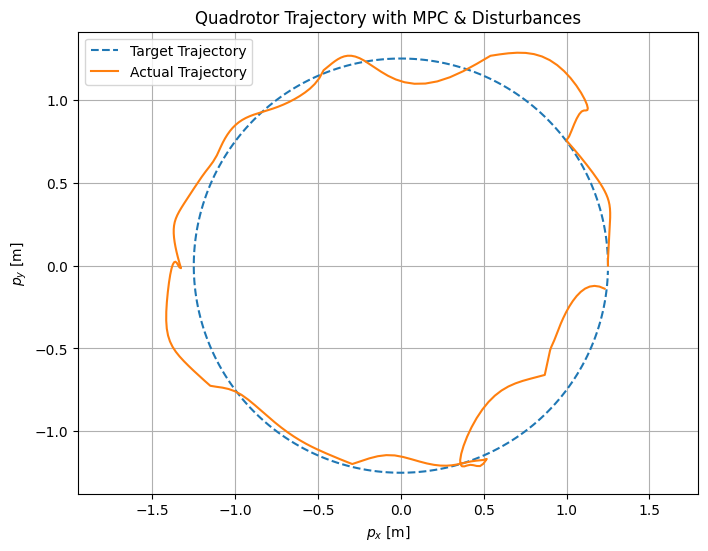

In [32]:
# Extract positions
px_sim = state_sim[0, :]
py_sim = state_sim[2, :]

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(px_target[:horizon_length], py_target[:horizon_length], label='Target Trajectory', linestyle='--')
plt.plot(px_sim[:horizon_length], py_sim[:horizon_length], label='Actual Trajectory')
plt.xlabel('$p_x$ [m]')
plt.ylabel('$p_y$ [m]')
plt.title('Quadrotor Trajectory with MPC & Disturbances')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

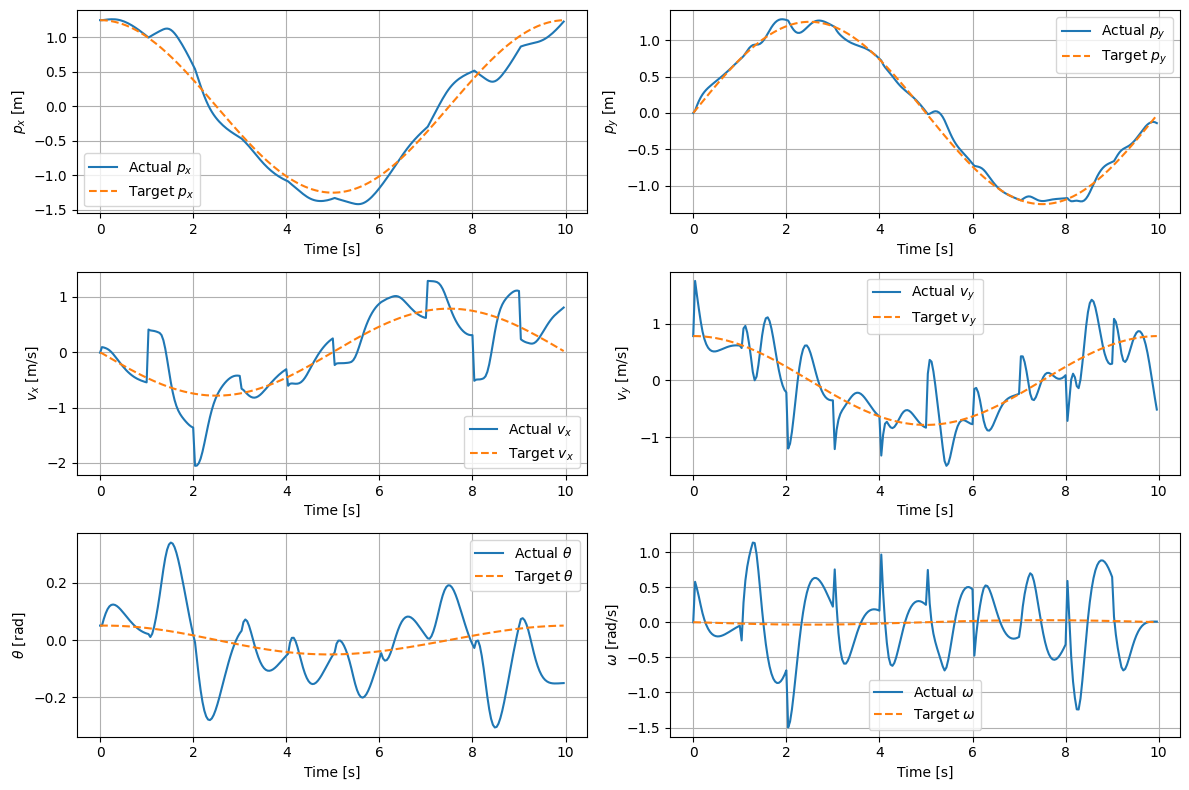

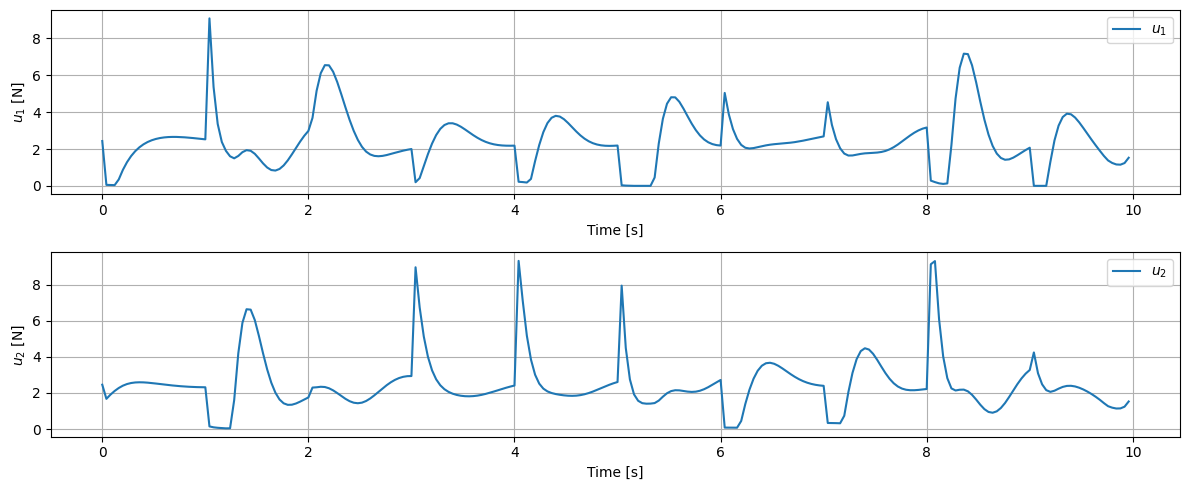

In [33]:
# Time vector
time_sim = t_sim

plt.figure(figsize=(12, 8))

# Position x
plt.subplot(3, 2, 1)
plt.plot(time_sim[:horizon_length], state_sim[0, :horizon_length], label='Actual $p_x$')
plt.plot(t[:horizon_length], px_target[:horizon_length], label='Target $p_x$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$p_x$ [m]')
plt.legend()
plt.grid()

# Position y
plt.subplot(3, 2, 2)
plt.plot(time_sim[:horizon_length], state_sim[2, :horizon_length], label='Actual $p_y$')
plt.plot(t[:horizon_length], py_target[:horizon_length], label='Target $p_y$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$p_y$ [m]')
plt.legend()
plt.grid()

# Velocity x
plt.subplot(3, 2, 3)
plt.plot(time_sim[:horizon_length], state_sim[1, :horizon_length], label='Actual $v_x$')
plt.plot(t[:horizon_length], vx_target[:horizon_length], label='Target $v_x$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$v_x$ [m/s]')
plt.legend()
plt.grid()

# Velocity y
plt.subplot(3, 2, 4)
plt.plot(time_sim[:horizon_length], state_sim[3, :horizon_length], label='Actual $v_y$')
plt.plot(t[:horizon_length], vy_target[:horizon_length], label='Target $v_y$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$v_y$ [m/s]')
plt.legend()
plt.grid()

# Theta (orientation)
plt.subplot(3, 2, 5)
plt.plot(time_sim[:horizon_length], state_sim[4, :horizon_length], label='Actual $\\theta$')
plt.plot(t[:horizon_length], theta_target[:horizon_length], label='Target $\\theta$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$\\theta$ [rad]')
plt.legend()
plt.grid()

# Omega (angular velocity)
plt.subplot(3, 2, 6)
plt.plot(time_sim[:horizon_length], state_sim[5, :horizon_length], label='Actual $\\omega$')
plt.plot(t[:horizon_length], omega_target[:horizon_length], label='Target $\\omega$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$\\omega$ [rad/s]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Control inputs over time
time_controls = time_sim[:-1]

plt.figure(figsize=(12, 5))

# Rotor thrust u1
plt.subplot(2, 1, 1)
plt.plot(time_controls[:horizon_length], u_sim[0, :horizon_length], label='$u_1$')
plt.xlabel('Time [s]')
plt.ylabel('$u_1$ [N]')
plt.legend()
plt.grid()

# Rotor thrust u2
plt.subplot(2, 1, 2)
plt.plot(time_controls[:horizon_length], u_sim[1, :horizon_length], label='$u_2$')
plt.xlabel('Time [s]')
plt.ylabel('$u_2$ [N]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [34]:
# Animating robot for 10 sec
quadrotor.animate_robot(state_sim[:horizon_length], u_sim[:horizon_length])

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAuZdtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
Eb5liIQAO//+906/AptFl2oDklcK9sqkJlm5UmsB8qYAAAMAAAMAAAMAABH5cLAuyiEuZJAAAAMA
EzAC3gGqAVYBhT85A0T90eABESP3ATZBsfRWYYKQyH9FYaJhZgC0iWFFh63kMmX7s+0cydB2uiLg
m6NdUr25H+5q/UOrkKsunbzfT9JNmcVIqGu2KgKQ8H07JVOfCdPgyVGNKPlr+M+J41iyL+P7iLKa
LX57COL4/tZXe9o+kP3nhBzjaPp2Ye6fLqRDNKToI0+s4whCIYEU169/Sjd4xrERBBt1j/YiKoTK
XIODL7n5FHGGPl1pQ7tzPGmH3OZvOkVXv0Vj2cr8mXHFl8mMr69WUyGfZHW/f0L75r0DSWqw1h2O
vJKOpQ9P8FecMCCYNd87riOmLIicnHsBMdqrymIhd8zqTyBSQ/pHnV3umtv+o/J6/ws88Qe3ONgU
Wqn7AorM+LAmktvAxcrT8pPklWjHNpAwxKdlCEwKd91/J8626QouDenqpZPv7ahuvKusiJK/OJi2
r3G+LRHdO9GtG/WbE45EQNeR/mC7hVAkLxwyFrXupOJM3weGKtVV3t8nHj2ru0Y/bR2kTdViezf9
WfdBp9+TxCTjQrzvtriAkIoaJtHQX5yUpRTxhaPivuO0eQGq91Pwe5RR/7Yz9OD1qUOYO2BN2gf1
Hx7VV5QkudM2W5WhNcyFXMMOVfKEA32BXDqBcJctX9RJORWCS/OZGLwi7m98w5ZqoIaAtKYW+9F7
zuUSe0lm6gTaoEF2GZ9pMuF7De1uSi0Qd4Wa/+X5Jyc/TuQ3tfAcRZiMNzOx5j9zi9JNFH3kjsV3
qyt+0GGJaG59ZY9mwxh87IhL+OdxucIjR6IDTKGVU+2f7L3EwjW5zM/KYi7l3yomwouFofGIg32f
CUDBb4E9IWwFAAeYfaVEunEPoeLviZB2VKZ8GGOmPkcgnVRpfYW5AQAAAwAG3vXDcAACgeqHeDkF
YRK72fbA1w31QYgPg0BB7I1sEGPwN9NvnVU/PM05tzbCbYISpEXnUqaoVLSK4wmSnOJDpZtrfRDt
K0Be51gnx/5c/v1MFr5esw8Gvb1znurjL2XaWJEC6yq/j3rE9lZWHwKf6WimH+q2zGeZnjy+4V3I
yqdP1EIbAeOEWGLZouyd4tFhpBoa0PTmvlzlrAwWTiiK6pKyTz7J/8QriqU0s3pT7W9qCiP2oM+4
/+S6NUhU7AibnDrsMDvc66fF7Fvy2sfW6UuEYLi9o/nLtTGqb2+N5VnEreh1WNhyrYIPW4mYnp6f
fqXrT1JUupjyF+Fro6fhJgG+KkE/oBeHf5RFRFm2nFksgJy2xyrudiqspM6YA9DeRg+DEmystF0+
h27NnTDilh1WrT1QV/zfNWexz1n08hhMyjrSVn64h0vAAAADAAADAAAXABxxSgAFyG1spkUxovmQ
GsdExJZkfZZeWUrRbNJwvZYaLMH96RN3LRCPq/RXGzGYIRFIuEv8oerDW0d9Gy1L577feMIZX1xi
hzukzx6/BLo4csCazHfn1mO8Wig5xt/LwfTOXBy8gv1ETTLDaxvWavrZFn2M2JiVyhYMrPAkQ8un
ieT6vfaunc0gsFSWb347EcXhyNR/wffapxa1baBwJ/t8ygVikOd2nf1F/NIun6zJJzWIZQJA8Bn+
SMmMuTjwELiK0WX7I5ZveEqgi62YjABEN5WQHFjK/Vo5uTHIEmjpF8XTMYHs5CJHA2xZkSBKeWL+
UjFA1kBsgS3gweX2nE2En/LdBYTHqw/JmAnpjXs1BYJnqynlfT+sANUBMh3HPZmt2CBceZzNIyoZ
G82084yJaLvojdZoSP/D7Hd9vZ0or/slxg9j39wKjsfdwdi8aaYkHjahXjuyxAoWU9pUVlggjZvN
spXtm0pgAAADAAAN8MMuogADIbA/k3lUF9PaBKFtYiTQYpsjD238hc/ZpxfJ5YZDsvEHbQHvSi0/
cDjSUxA+GSpkvA34YVOqsg6ExCPRGvK2PXEeAhn8YXktyz8sIjXfln98VEFU/mX0EfLFDIHytHI4
UDJdvYO3BIb3iPrL9C7c4pN63H/USS8tM+qzus3Y/UY6U2U3EYUvcAIpp6+SnnQPY9vf9OoFbmK6
OYoxyTZ3MBDIU/WF5f3jPhgtBofSl40LowJalRuhqq8MCUXleA3kOKCRJTzp48/GqNE4W5U0Jkdc
QFbNz7VRGK3ChNizg+e0sQ+5ZgCPIiJsI4qnOvEwueLa12AaJZJpuTCMV8BS7x/iqjoCFO+hbK8r
n/kaTe7LApIvYN5VzCAA0l1bh3Nuws3YUtwR6FshGpGOHdUdHxpk9J/jLdkrW1czSQJ0Debo4cr4
V2PI0DgzQeF95viUUNoVOSBFM4ZDCPcgvLf7SQBRqlonU8ZyxSYtLHjy/ZZ117s3AAyB5A2vCFrN
U7bHNDYNvfK7i+Hgxmtn9IJffuGi6qWKc+UkidCaA3f76xQKsjbEJ1Fk8tXpPyowA8EdTHivmtxT
uRCJk5Al+UNPyliBCsdKUB8j9bHai4iMEjR9MF+RX49xE8jnZes2OxUs8o8d48Gy83VavuZMZAHi
5suQM3PAhrMwZycPzsEueRNyreRAIVp6JVw4FZvieL1AKnE2di/36+kdL8t9ASTVX5XBiyFoVFke
uW1vEpPFNLFaB6me4Y5g3NiypT0m3DM78btgYgUrCr26N7x6xfhJYmnqexjmpIaMFb4sYjX5TfH0
/G3SpvA3aTdCO0Z+KFGKeUmq7TwoI3so0YK7vDYmtkUYRe65e1YFQhtCBYAAAAMAACm+oAqqOn7g
MY89NNKSw7x2Rsrv9Q3lxhFqRIL7sBAaTtwQAsWiP8E5PrRHxzjhxqx2RXOw/PpbX0dbIAg11nnH
IGJRlXDQBtI9wy+4AC8IR

## Simulation without disturbance

In [35]:
import time
# Initial state
x_init = np.array([px_target[0], vx_target[0], py_target[0], vy_target[0], theta_target[0], omega_target[0]])
horizon_length = N  # Simulate for the entire duration

# Recording how long this is going to take
start_time = time.time()

# Simulate
t_sim, state_sim, u_sim = quadrotor.simulate(x_init, controller_mpc, horizon_length, disturbance=False)

# Stopping recording
total_time = time.time()
total_time -= start_time

In [36]:
# Printing duration of simulation processing taken
print(f"\nTOTAL DURATION: {total_time:.4f} sec")


TOTAL DURATION: 530.9226 sec


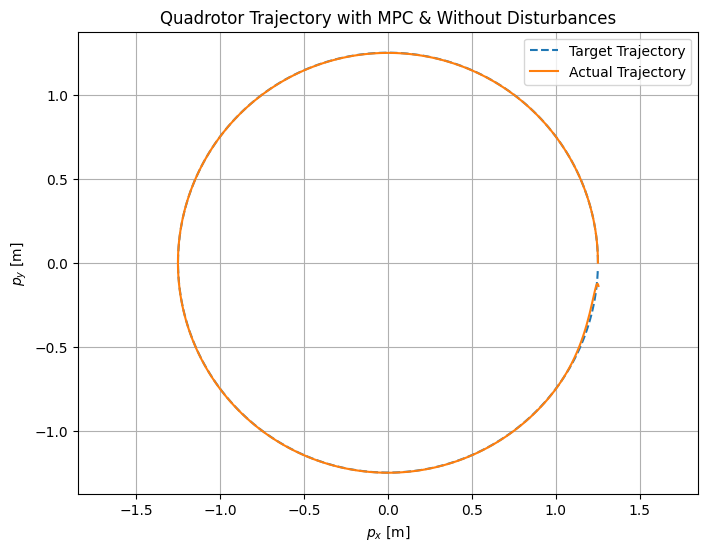

In [37]:
# Extract positions
px_sim = state_sim[0, :]
py_sim = state_sim[2, :]

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(px_target[:horizon_length], py_target[:horizon_length], label='Target Trajectory', linestyle='--')
plt.plot(px_sim[:horizon_length], py_sim[:horizon_length], label='Actual Trajectory')
plt.xlabel('$p_x$ [m]')
plt.ylabel('$p_y$ [m]')
plt.title('Quadrotor Trajectory with MPC & Without Disturbances')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

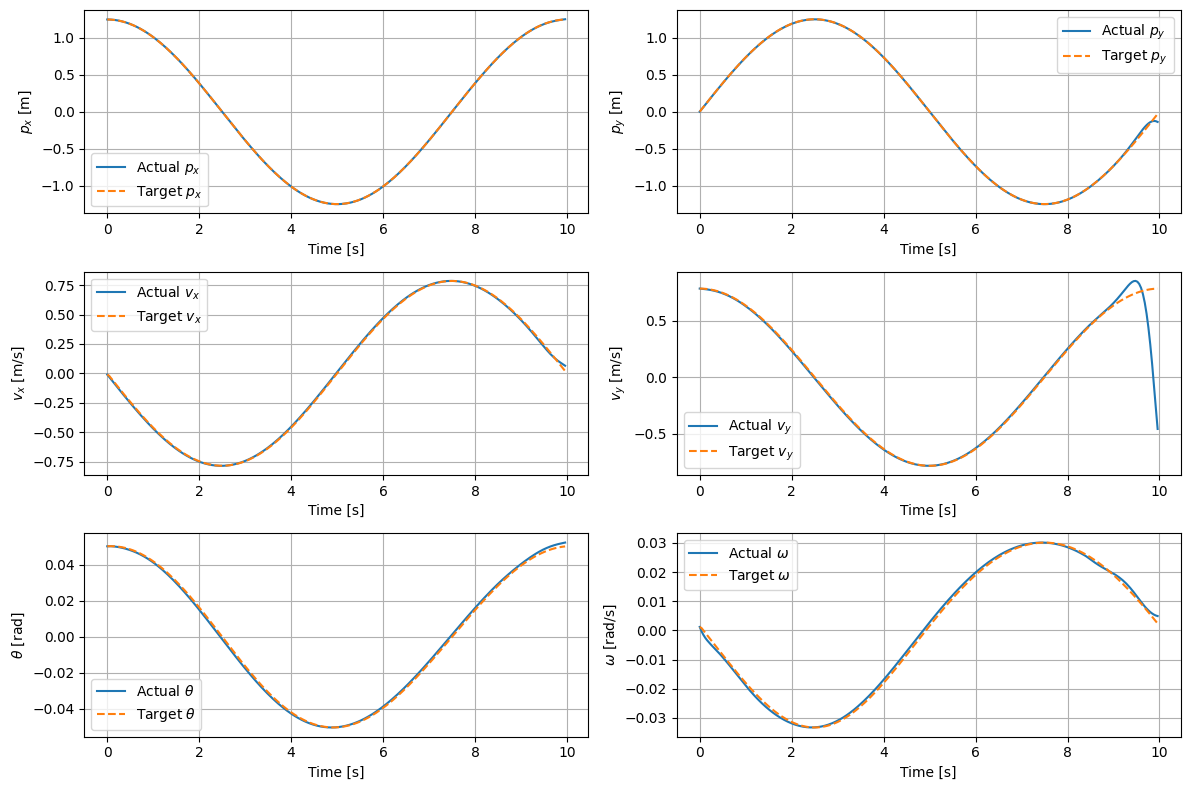

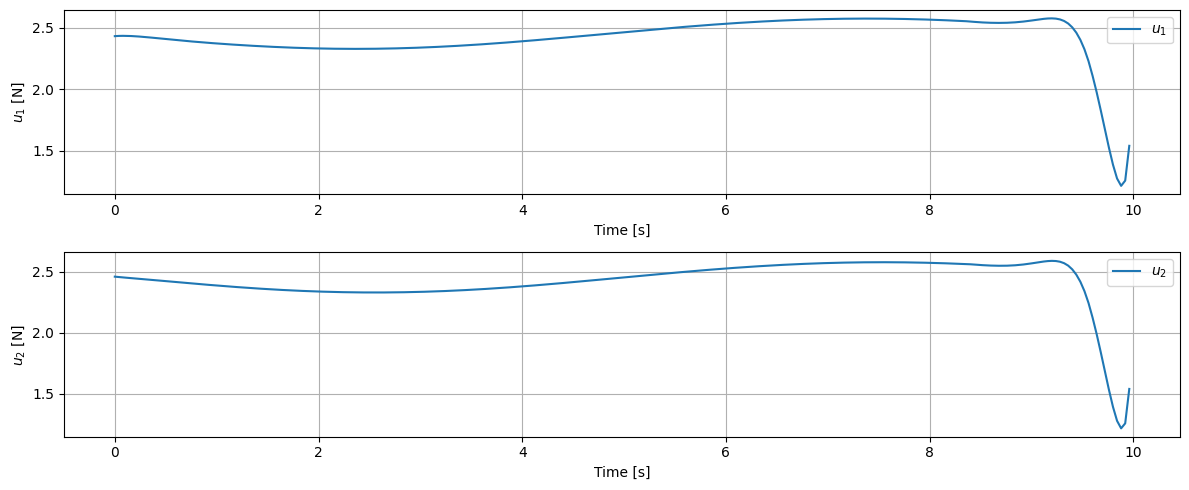

In [38]:
# Time vector
time_sim = t_sim

plt.figure(figsize=(12, 8))

# Position x
plt.subplot(3, 2, 1)
plt.plot(time_sim[:horizon_length], state_sim[0, :horizon_length], label='Actual $p_x$')
plt.plot(t[:horizon_length], px_target[:horizon_length], label='Target $p_x$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$p_x$ [m]')
plt.legend()
plt.grid()

# Position y
plt.subplot(3, 2, 2)
plt.plot(time_sim[:horizon_length], state_sim[2, :horizon_length], label='Actual $p_y$')
plt.plot(t[:horizon_length], py_target[:horizon_length], label='Target $p_y$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$p_y$ [m]')
plt.legend()
plt.grid()

# Velocity x
plt.subplot(3, 2, 3)
plt.plot(time_sim[:horizon_length], state_sim[1, :horizon_length], label='Actual $v_x$')
plt.plot(t[:horizon_length], vx_target[:horizon_length], label='Target $v_x$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$v_x$ [m/s]')
plt.legend()
plt.grid()

# Velocity y
plt.subplot(3, 2, 4)
plt.plot(time_sim[:horizon_length], state_sim[3, :horizon_length], label='Actual $v_y$')
plt.plot(t[:horizon_length], vy_target[:horizon_length], label='Target $v_y$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$v_y$ [m/s]')
plt.legend()
plt.grid()

# Theta (orientation)
plt.subplot(3, 2, 5)
plt.plot(time_sim[:horizon_length], state_sim[4, :horizon_length], label='Actual $\\theta$')
plt.plot(t[:horizon_length], theta_target[:horizon_length], label='Target $\\theta$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$\\theta$ [rad]')
plt.legend()
plt.grid()

# Omega (angular velocity)
plt.subplot(3, 2, 6)
plt.plot(time_sim[:horizon_length], state_sim[5, :horizon_length], label='Actual $\\omega$')
plt.plot(t[:horizon_length], omega_target[:horizon_length], label='Target $\\omega$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$\\omega$ [rad/s]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Control inputs over time
time_controls = time_sim[:-1]

plt.figure(figsize=(12, 5))

# Rotor thrust u1
plt.subplot(2, 1, 1)
plt.plot(time_controls[:horizon_length], u_sim[0, :horizon_length], label='$u_1$')
plt.xlabel('Time [s]')
plt.ylabel('$u_1$ [N]')
plt.legend()
plt.grid()

# Rotor thrust u2
plt.subplot(2, 1, 2)
plt.plot(time_controls[:horizon_length], u_sim[1, :horizon_length], label='$u_2$')
plt.xlabel('Time [s]')
plt.ylabel('$u_2$ [N]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [39]:
# Animating robot for 10 sections duration
quadrotor.animate_robot(state_sim[:horizon_length], u_sim[:horizon_length])

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAn3VtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
Ea5liIQAO//+906/AptFl2oDklcK9sqkJlm5UmsB8qYAAAMAAAMAAAMAABH5cLAuyiEuZJAAAAMA
EzAC3gGqAVYBhT85A0T90eABESP3ATZBsfRWYYKQyH9FYaJhZgC0iWFFh63kMmX7s+0cydB2uiLg
m6NdUr25H+5q/UOrkKsunbzfT9JNmcVIqGu2KgKQ8H07JVOfCdPgyVGNKPlr+M+J41iyL+P7iLKa
LX57COL4/tZXe9o+kP3nhBzjaPp2Ye6fLqRDNKToI0+s4whCIYEU169/Sjd4xrERBBt1j/YiKoTK
XIODL7n5FHGGPl1pQ7tzPGmH3OZvOkVXv0Vj2cr8mXHFl8mMr69WUyGfZHW/f0L75r0DSWqw1h2O
vJKOpQ9P8FecMCCYNd87riOmLIicnHsBMdqrymIhd8zqTyBSQ/pHnV3umtv/f+/dbQSuf3p25MgN
dk03QUZW3uMwA2Vryg1G/WuaZx94FsxgQ2KV10iwmkkCxPP6ZTx6qWT7+3GWvulaERJX5xMW1e43
xaI7p3o1o36zYnHIiBryP8wXcKoEheOGQta91JxJm+DwxVqqu9vk48e1d2jH7aO0ibqsT2b/qz7o
NPvyeIScaFed9tcS0hFDRNo6C/OSlKKeMLR8V9x2jyA1Xup+D3KKP/bGfpwet6T0FWxS6FJ+o+Pa
qvKElzfOy3K0JrmQq5uKSr5RwG+wK4dQLhLlq/qJJ2Nvo/4YpLA+kOUfMFdStGZX1fu/++hdC7wo
Sl7OygU2p/v9/cfaTLhhC2RnQxxEHeFmv/l+ScnP07kM/XwHEWYjDczseY/c4vSTRR95I7HgJ1D2
S2mJA7nDQ+AfLYYw+dkQl9tyzc4CYdzv1m0qvpUfYr+RHM0xZ+uxF3MB3tVJQf7Kpv/2zlZ81B2d
wgWFFsYA00vnVgs/UO9Vf4wXBrFy8iNgDfiVYRVIlnAMFW+3DEMNlHm54ZVMSNwiV3s+0Z6aplNE
4LZjzVviVVBjekr0At1VPzzNObc0Yz3/nWxF4IflNC+1suMJkkwyQvU21voh2laAvjjIsZp5c/v1
MFr5cIHAR4o9/hJt5L2XaWJDUH+X2tO/E9lZWHvjf2pXqv9U1mkO3pMDmj109odTFbW+C3lDM90K
eggNGcWiw1BFNgZTghLTlrAwWTiiJqo9Vf5+GB+YVxVKaUlMGY83tQ/NKZVm3EDfuB1SEnr3QBdA
rsy4oE86jrACzbEW1/Y68YGC4wCAdGBIUlH7EmOVZxKToJSbrixpaPvyLYd51lA6HKaDfg2sGdw5
rDqncKUFEA3xUgn9ALvx++QkRZtola/aPNinBA4OSn9OZNjHKkQAAhUpbmUZjvJrU6fzKR4N6wIk
2F2uGljawlPycKI1iiOElXcn4eAbeambsc7PEeI3xunt0QAOE5mNlh2lYUCIzdhVXGmPem7ka8iD
G3tlgZr/mNXQMqoGIo/O0IKWBV8SrhHPwwaz6k5Lnj/lzXawGOV11mC+XiLhPLspVfI6MPdPISS+
e+36JCJjgcYoc+pM8evwS6OFuRxWizn5ZJ+w0WRpSXB2uDtM55eOUOV21jes1fWyLPwYw4wZNfVR
2SCQTxitrzpczHS1LnNILBVFkR+PAWi/VjnH+iVTVN5A1ogoMCPai6qLWKQ53ad/UYDNrfOed75G
tupCTvI/b82zqW43n5RS+A6jp2QY9pKiQsvAU/vPyWOL1tENfONMlu3xJajHB5WJhbKDvgrvZPD8
fVRuROv9YW5tXfSB23q3+gftOJkHnwW0BbfZXk6hHSjiLF0Rns/nG1u3kjYXS5q/8pgS9K/iUYYl
2t5AYLxXGOiyKPskxINCbH2qCj/80fZSiGwPtAuN6bpv1H2E750ffYyVhVO8jM6KHYJsVzD0kUry
scdJLnKAAAADAAADADTwAyQDc6QHsv+NNSeGGZRUOlqRTR7JVH8YgEuR3q7pL9X9MA6dxrAZZlXL
Q9Jv7//4/TMJp2J9u30TL3z9q8r+W68aAeLgCZZPh7lZRF+84otLW1kyJYPhx+vo6bLrI3tZplSY
CJqMYloH45s1e0eUN9DhbQEMhxIl2287ryH+s6HgM3Dh76XLo34sBmCxYl97Q7LqaLYr2u+1klaI
6ypHQPY9vgC/Ob5e+NcYDQfT5yNfnWRaZlQqjXeSHWbDtbCeWqiHWxfeGcmRByRmeDXyXBxzfVUR
5kK+qNE4W5U0DuECnuBjcZ1wK3/pvKVnbMHY9twWE3QYXTrII8/it2HV1KTflpAQi7vF+p9LkgF5
0aQ8pot4+6/2Q1/jqsfcKaNQ4EmCmrOyIirPeUdj22whbQpL0vIupuqkolcp2PCFfgyHF6PxufKS
tGnt/SpGSX9dBHd50NlgzB4BoPrQ1WBpmM2x9qODFdKBNhyJG5fcaKWtdx8ZUBAFUwMN8pK7DChm
/tJLeMsVbAdM+Y38xiXcEzlLgXG+LLg0K+uYsqqaO50go9csrGSyHea1Md5EWdKirTqLM5hXVdMf
HiUFfFny4CDW4wx15jmrNxk+759lMQkfFnbl9K6iF20/J8wZURWz8Iz9FWlWIIy4YX0xIFtS612S
H1Oc7/nSj+2Np0WAZHAltcM3lPwdUcxqwspuFL6pSejBvoxjXSXMa8M2YSfp8orjvDyJ7EXnKHMW
HEc/4P5mTK49G4i/8hGfaogy4FwJJnGUyWt+Ti3fy2/Z+uGBhsp6oicdwJz/ECnqGIPE6YjHTCW4
riLyx/hhODklbxwSvmq8NzV6toWnRmnNZtIAAAMAAAMAAucF0dWn0eK+pE5jfMB3Zyd0cfOMDJPZ
YlkeaWglFEjTAKKkbBanXLvzUs7/H5vrT/gtcKvR6WeOvODYMdIBY5iNvg/g9P26QZWgdr8NtpBM
UPo906aagHLcHlHfclrrB

## Bonus

In [40]:
# Import necessary libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import IPython
import quadrotor 
import time
import cvxopt
from cvxopt import matrix, solvers
from scipy.sparse import lil_matrix

# Suppress cvxopt output
solvers.options['show_progress'] = False

# Quadrotor parameters
MASS = quadrotor.MASS          # Mass of the quadrotor (kg)
LENGTH = quadrotor.LENGTH      # Length of the quadrotor (m)
INERTIA = quadrotor.INERTIA    # Inertia of the quadrotor (kg·m²)
DT = quadrotor.DT              # Time step (s)
G = 9.81                       # Gravity constant (m/s²)
NX = quadrotor.DIM_STATE       # Number of state variables
NU = quadrotor.DIM_CONTROL     # Number of control inputs

In [41]:
# Trajectory parameters
DURATION = 10.0
N = int(DURATION / DT)
t = np.linspace(0, DURATION, N + 1)

# Cost weights
q_px = 300      # Position weight in x-direction
q_py = 150.0    # Position weight in y-direction
q_v = 1.0       # Velocity weight
q_theta = 10.0  # Orientation weight
q_omega = 10.0  # Angular velocity weight
r_u = 1.0       # Control effort weight

# Cost weight matrices
Q = np.diag([q_px, q_v, q_py, q_v, q_theta, q_omega])
R = r_u * np.eye(NU)

# Looping trajectory parameters
radius = 1
angular_speed = 2.4 * np.pi / 12.0 

# Computing target positions & velocities
px_target = radius * np.sin(angular_speed * t)
py_target = 1 - radius * np.cos(angular_speed * t)
vx_target = radius * angular_speed * np.cos(angular_speed * t)
vy_target = radius * angular_speed * np.sin(angular_speed * t)

# Computing desired accelerations
ax_target = -radius * (angular_speed**2) * np.sin(angular_speed * t)
ay_target = radius * (angular_speed**2) * np.cos(angular_speed * t)

# Computing desired pitch angle
theta_target =-np.arctan2(ax_target, ay_target + G)
omega_target = np.gradient(theta_target, DT)
# Suppressing progress output from cvxopt
solvers.options['show_progress'] = False

In [42]:
### MPC Controller Function ###
def mpc_controller(x_current, t_current):
    # If t_current >= N, return hover control
    if t_current >= N:
        hover_thrust = MASS * G / 2
        return np.array([hover_thrust, hover_thrust])

    # Prediction horizon
    N_p = 40
    N_p = min(N_p, N - t_current)

    num_vars = N_p * (NX + NU) + NX  # States and controls

    z0 = np.zeros(num_vars)

    # Initializing z0
    for k in range(N_p):
        idx_k = k * (NX + NU)
        # State x_k
        if k == 0:
            z0[idx_k: idx_k + NX] = x_current
        else:
            z0[idx_k: idx_k + NX] = z0[idx_k - (NX + NU): idx_k - (NX + NU) + NX]
        # Control u_k | initial guess: hover thrust
        hover_thrust = MASS * G / 2
        z0[idx_k + NX: idx_k + NX + NU] = np.array([hover_thrust, hover_thrust])

    # Final state x_{N_p}
    idx_k = N_p * (NX + NU)
    if t_current + N_p <= N:
        z0[idx_k: idx_k + NX] = np.array([
            px_target[t_current + N_p],
            vx_target[t_current + N_p],
            py_target[t_current + N_p],
            vy_target[t_current + N_p],
            theta_target[t_current + N_p],
            omega_target[t_current + N_p]
        ])
    else:
        z0[idx_k: idx_k + NX] = z0[idx_k - (NX + NU): idx_k - (NX + NU) + NX]

    # Solving the MPC optimization problem
    z_solution = mpc_sqp_solver(z0, x_current, t_current, N_p)

    # Extracting the first control input
    u0 = z_solution[NX: NX + NU]
    return u0

In [43]:
### MPC SQP Solver Function ###
def mpc_sqp_solver(z0, x0, t_current, N_p):
    z = z0.copy()
    max_iter = 50
    tol = 1e-4
    alpha_min = 1e-10
    rho = 0.75
    c_merit = 0.9
    reg_factor = 1e-5

    num_vars = N_p * (NX + NU) + NX  # States and controls

    lambda_guess = np.zeros((N_p) * NX)  # Initializing Lagrange multipliers
    mu_guess = np.zeros(5 * (N_p))  # Initializing multipliers for inequality constraints
    lambda_guess_new = np.zeros((N_p) * NX)  # Initializing Lagrange multipliers
    mu_guess_new = np.zeros(5 * (N_p))  # Initializing multipliers for inequality constraints
    Q = np.diag([300.0, 1.0, 150.0, 1.0, 10.0, 10.0])
    for it in range(max_iter):
        # Computing cost, gradient, Hessian
        J = compute_cost_mpc(z, t_current, N_p)
        grad_J = compute_cost_gradient_mpc(z, t_current, N_p)
        H = compute_cost_hessian_mpc(z, N_p)

        # Computing constraints and Jacobians
        c = compute_constraints_mpc(z, x0, N_p)
        G = compute_constraints_jacobian_mpc(z, x0, N_p).toarray()

        # Computing inequality constraints
        h = compute_inequality_constraints_mpc(z, N_p)
        G_ineq = compute_inequality_constraints_jacobian_mpc(z, N_p).toarray()

        # Setting up QP
        P = cvxopt.matrix(0.5 * (H + H.T) + reg_factor * np.eye(num_vars))
        q = cvxopt.matrix(grad_J)
        Aeq = cvxopt.matrix(G)
        beq = cvxopt.matrix(-c)  # Note the sign change for cvxopt
        G_qp = cvxopt.matrix(G_ineq)
        h_qp = cvxopt.matrix(-h)

        # Solving QP
        try:
            sol = solvers.qp(P, q, G_qp, h_qp, Aeq, beq)
            p = np.array(sol['x']).flatten()
            p_lambda = np.array(sol['y']).flatten()
            p_mu = np.array(sol['z']).flatten()
            if p is None:
                print(f"QP solver failed at iteration {it + 1}")
                break
        except Exception as e:
            print(f"QP solver encountered an error at iteration {it + 1}: {e}")
            break

        # Line search with merit function
        alpha = 1.0
        while True:
            z_candidate = z + alpha * p
            J_new = compute_cost_mpc(z_candidate, t_current, N_p)
            c_new = compute_constraints_mpc(z_candidate, x0, N_p)

            # Computing inequality constraints for z
            u = np.zeros((N_p, NU))
            for k in range(N_p):
                idx_uk = k * (NX + NU) + NX
                u[k, :] = z[idx_uk:idx_uk + NU]
                py = z[k*(NX + NU) + 2]
            violation_lower = np.maximum(0, -u)  # Violation of u_k >= 0
            violation_upper = np.maximum(0, u - 10)  # Violation of u_k <= 10
            violation_py = np.maximum(0, -py)
            violations = np.concatenate([violation_lower, violation_upper])
            total_inequality_violation = np.sum(np.abs(violations)) + np.sum(np.abs(violation_py))

            # Penalty for constraints
            penalty = 1e-2 * (np.sum(np.abs(c)))+ 1e-3 *(total_inequality_violation)

            # Computing inequality constraints for z_candidate
            u_new = np.zeros((N_p, NU))
            for k in range(N_p):
                idx_uk = k * (NX + NU) + NX
                u_new[k, :] = z_candidate[idx_uk:idx_uk + NU]
                py_new = z_candidate[k*(NX + NU) + 2]
            violation_lower_new = np.maximum(0, -u_new)  # Violation of u_k >= 0
            violation_upper_new = np.maximum(0, u_new - 10)  # Violation of u_k <= 10
            violation_py_new = np.maximum(0, -py_new)
            violations_new = np.concatenate([violation_lower_new, violation_upper_new])
            total_inequality_violation_new = np.sum(np.abs(violations_new)) + np.sum(np.abs(violation_py_new))

            # Penalty for constraints
            penalty_new = 1e-2 * (np.sum(np.abs(c_new)))+ 1e-3 *(total_inequality_violation_new)

            # Armijo condition with merit function
            merit_function = J + penalty
            merit_function_new = J_new + penalty_new

            if merit_function_new <= merit_function + c_merit * alpha * (grad_J.T @ p - penalty):
                # Accept the step
                z = z_candidate
                lambda_guess_new = p_lambda
                mu_guess_new = p_mu
                break
            else:
                alpha *= rho
                if alpha < alpha_min:
                    break

        # Computing optimality
        primal_optimality = np.linalg.norm(grad_J + G.T @ lambda_guess + G_ineq.T @ mu_guess)
        dual_optimality = np.linalg.norm(c)

        lambda_guess = lambda_guess_new
        mu_guess = mu_guess_new

        constraint_violation = np.linalg.norm(c) + np.linalg.norm(violations)

        # Checking for convergence
        if primal_optimality < tol and dual_optimality < tol:
            break
    return z

In [44]:
### Compute Cost MPC Function ###
def compute_cost_mpc(z, t_current, N_p):
    J = 0.0

    for k in range(N_p):
        idx_k = k * (NX + NU)
        x_k = z[idx_k: idx_k + NX]
        u_k = z[idx_k + NX: idx_k + NX + NU]
        if t_current + k <= N:
            x_t = np.array([
                px_target[t_current + k],
                vx_target[t_current + k],
                py_target[t_current + k],
                vy_target[t_current + k],
                theta_target[t_current + k],
                omega_target[t_current + k]
            ])
        else:
            x_t = x_t_prev
        x_t_prev = x_t  # Save for future use

        J += 0.5 * (x_k - x_t).T @ Q @ (x_k - x_t) + 0.5 * u_k.T @ R @ u_k

    # Final state cost
    idx_k = N_p * (NX + NU)
    x_k = z[idx_k: idx_k + NX]
    if t_current + N_p <= N:
        x_t = np.array([
            px_target[t_current + N_p],
            vx_target[t_current + N_p],
            py_target[t_current + N_p],
            vy_target[t_current + N_p],
            theta_target[t_current + N_p],
            omega_target[t_current + N_p]
        ])
    else:
        x_t = x_t_prev

    J += 0.5 * (x_k - x_t).T @ Q @ (x_k - x_t)

    return J

In [45]:
### Compute Cost Gradient MPC Function ###
def compute_cost_gradient_mpc(z, t_current, N_p):
    grad = np.zeros_like(z)

    for k in range(N_p):
        idx_k = k * (NX + NU)
        x_k = z[idx_k: idx_k + NX]
        u_k = z[idx_k + NX: idx_k + NX + NU]
        if t_current + k <= N:
            x_t = np.array([
                px_target[t_current + k],
                vx_target[t_current + k],
                py_target[t_current + k],
                vy_target[t_current + k],
                theta_target[t_current + k],
                omega_target[t_current + k]
            ])
        else:
            x_t = x_t_prev
        x_t_prev = x_t

        grad[idx_k: idx_k + NX] = Q @ (x_k - x_t)
        grad[idx_k + NX: idx_k + NX + NU] = R @ u_k

    # Final state gradient
    idx_k = N_p * (NX + NU)
    x_k = z[idx_k: idx_k + NX]
    if t_current + N_p <= N:
        x_t = np.array([
            px_target[t_current + N_p],
            vx_target[t_current + N_p],
            py_target[t_current + N_p],
            vy_target[t_current + N_p],
            theta_target[t_current + N_p],
            omega_target[t_current + N_p]
        ])
    else:
        x_t = x_t_prev

    grad[idx_k: idx_k + NX] = Q @ (x_k - x_t)

    return grad

In [46]:
# Compute Cost Hessian MPC Function ###
def compute_cost_hessian_mpc(z, N_p):
    H = np.zeros((len(z), len(z)))

    for k in range(N_p):
        idx_k = k * (NX + NU)
        # State Hessian
        H[idx_k: idx_k + NX, idx_k: idx_k + NX] = Q
        # Control Hessian
        H[idx_k + NX: idx_k + NX + NU, idx_k + NX: idx_k + NX + NU] = R

    # Final state Hessian
    idx_k = N_p * (NX + NU)
    H[idx_k: idx_k + NX, idx_k: idx_k + NX] = Q

    return H

In [47]:
### Compute Constraints MPC ###
def compute_constraints_mpc(z, x0, N_p):
    c = np.zeros(N_p * NX)

    for k in range(N_p):
        idx_k = k * (NX + NU)
        idx_kp1 = (k + 1) * (NX + NU)
        if k == 0:
            x_k = x0
        else:
            x_k = z[idx_k: idx_k + NX]
        u_k = z[idx_k + NX: idx_k + NX + NU]
        x_kp1 = z[idx_kp1: idx_kp1 + NX]

        # Dynamics
        f_k = np.zeros(NX)
        f_k[0] = x_k[1]
        f_k[1] = -(u_k[0] + u_k[1]) * np.sin(x_k[4]) / MASS
        f_k[2] = x_k[3]
        f_k[3] = (u_k[0] + u_k[1]) * np.cos(x_k[4]) / MASS - G
        f_k[4] = x_k[5]
        f_k[5] = LENGTH * (u_k[0] - u_k[1]) / INERTIA

        c[k * NX: (k + 1) * NX] = x_kp1 - x_k - DT * f_k

    return c

In [48]:
### Compute Constraints Jacobian MPC Function ###
def compute_constraints_jacobian_mpc(z, x0, N_p):
    num_constraints = N_p * NX
    G = lil_matrix((num_constraints, len(z)))

    for k in range(N_p):
        idx_k = k * (NX + NU)
        idx_kp1 = (k + 1) * (NX + NU)

        if k == 0:
            x_k = x0
            compute_wrt_xk = False  # x_k is x0, constant
        else:
            x_k = z[idx_k: idx_k + NX]
            compute_wrt_xk = True

        u_k = z[idx_k + NX: idx_k + NX + NU]
        x_kp1 = z[idx_kp1: idx_kp1 + NX]

        theta_k = x_k[4]
        u1_k = u_k[0]
        u2_k = u_k[1]

        # Compute partial derivatives
        df_dx = np.zeros((NX, NX))
        df_du = np.zeros((NX, NU))

        df_dx[0, 1] = 1.0

        df_dx[1, 4] = - (u1_k + u2_k) * np.cos(theta_k) / MASS
        df_du[1, 0] = - np.sin(theta_k) / MASS
        df_du[1, 1] = - np.sin(theta_k) / MASS

        df_dx[2, 3] = 1.0

        df_dx[3, 4] = - (u1_k + u2_k) * np.sin(theta_k) / MASS
        df_du[3, 0] = np.cos(theta_k) / MASS
        df_du[3, 1] = np.cos(theta_k) / MASS

        df_dx[4, 5] = 1.0

        df_du[5, 0] = LENGTH / INERTIA
        df_du[5, 1] = - LENGTH / INERTIA

        # Build Jacobian
        # Partial derivatives of c_k w.r.t x_kp1
        G[k * NX: (k + 1) * NX, idx_kp1: idx_kp1 + NX] = np.eye(NX)

        if compute_wrt_xk:
            # Partial derivatives of c_k w.r.t x_k
            G[k * NX: (k + 1) * NX, idx_k: idx_k + NX] = -np.eye(NX) - DT * df_dx

        # Partial derivatives of c_k w.r.t u_k
        G[k * NX: (k + 1) * NX, idx_k + NX: idx_k + NX + NU] = -DT * df_du

    return G.tocsc()

In [49]:
def compute_inequality_constraints_mpc(z, N_p):
    """
    Compute the inequality constraints for the MPC problem.
    Includes control input limits and altitude constraints.
    """
    # Control input constraints
    h = np.zeros(5 * N_p)
    for k in range(N_p):
        idx_k = k * (NX + NU)
        u_k = z[idx_k + NX: idx_k + NX + NU]
        py_k = z[idx_k + 2]
        h[5 * k] = u_k[0] - 10.0        # u1_k <= 10
        h[5 * k + 1] = -u_k[0]          # u1_k >= 0
        h[5 * k + 2] = u_k[1] - 10.0    # u2_k <= 10
        h[5 * k + 3] = -u_k[1]          # u2_k >= 0
        h[5 * k + 4] = -py_k
    return h

def compute_inequality_constraints_jacobian_mpc(z, N_p):
    """
    Compute the Jacobian matrix of the inequality constraints.
    """
    G_ineq = lil_matrix((5 * N_p, len(z)))
    for k in range(N_p):
        idx_k = k * (NX + NU)
        # u1_k constraints
        G_ineq[5 * k, idx_k + NX] = 1.0          # u1_k <= 10
        G_ineq[5 * k + 1, idx_k + NX] = -1.0     # u1_k >= 0
        # u2_k constraints
        G_ineq[5 * k + 2, idx_k + NX + 1] = 1.0  # u2_k <= 10
        G_ineq[5 * k + 3, idx_k + NX + 1] = -1.0 # u2_k >= 0
        G_ineq[5 * k + 4, idx_k + 2] = -1.0

    return G_ineq.tocsc()

In [50]:
def controller_mpc(x, t_step):
    """
    Controller function for simulation.
    """
    # x is the current state
    # t_step is the current time index (integer)
    u = mpc_controller(x, t_step)
    return u

## Simulation with disturbance

In [51]:
# Initial state at the origin
x_init = np.array([0, 0, 0, 0, 0, 0])

# Horizon length equals total number of time steps
horizon_length = N  # Simulate for the entire duration

import time
# Recording how long this is going to take
start_time = time.time()

# Simulate the quadrotor
t_sim, state_sim, u_sim = quadrotor.simulate(x_init, controller_mpc, horizon_length, disturbance=True)

# Stopping recording
total_time = time.time()
total_time -= start_time

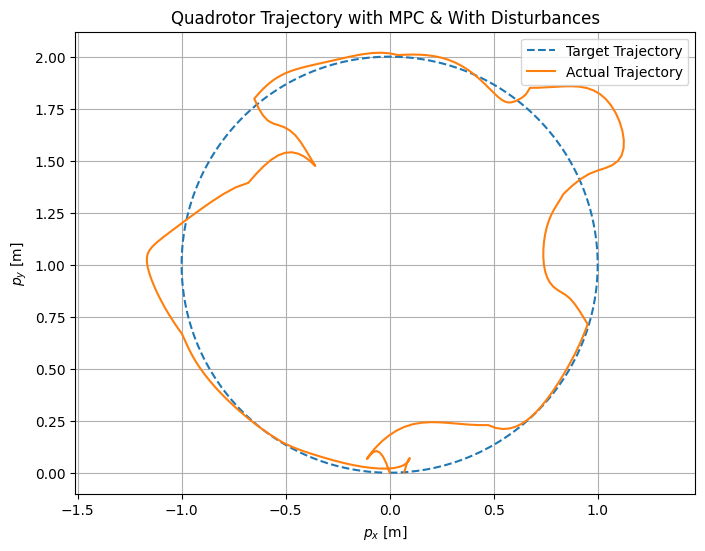

In [52]:
# Extract positions
px_sim = state_sim[0, :]
py_sim = state_sim[2, :]

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(px_target[:horizon_length], py_target[:horizon_length], label='Target Trajectory', linestyle='--')
plt.plot(px_sim[:horizon_length], py_sim[:horizon_length], label='Actual Trajectory')
plt.xlabel('$p_x$ [m]')
plt.ylabel('$p_y$ [m]')
plt.title('Quadrotor Trajectory with MPC & With Disturbances')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

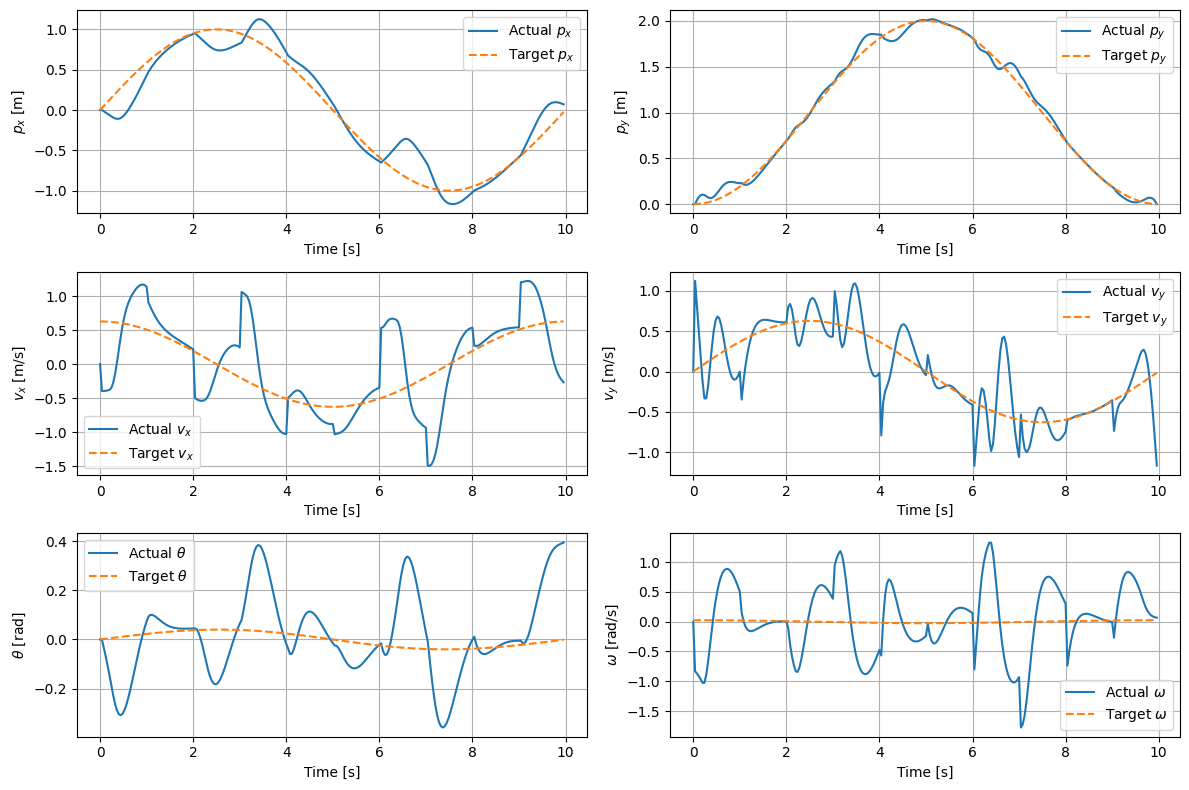

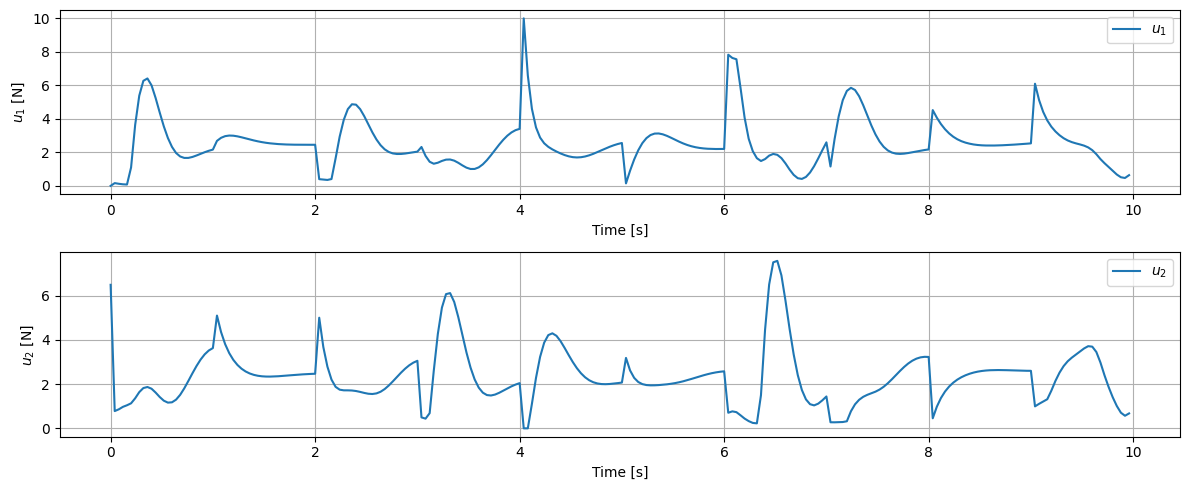

In [53]:
# Time vector
time_sim = t_sim

plt.figure(figsize=(12, 8))

# Position x
plt.subplot(3, 2, 1)
plt.plot(time_sim[:horizon_length], state_sim[0, :horizon_length], label='Actual $p_x$')
plt.plot(t[:horizon_length], px_target[:horizon_length], label='Target $p_x$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$p_x$ [m]')
plt.legend()
plt.grid()

# Position y
plt.subplot(3, 2, 2)
plt.plot(time_sim[:horizon_length], state_sim[2, :horizon_length], label='Actual $p_y$')
plt.plot(t[:horizon_length], py_target[:horizon_length], label='Target $p_y$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$p_y$ [m]')
plt.legend()
plt.grid()

# Velocity x
plt.subplot(3, 2, 3)
plt.plot(time_sim[:horizon_length], state_sim[1, :horizon_length], label='Actual $v_x$')
plt.plot(t[:horizon_length], vx_target[:horizon_length], label='Target $v_x$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$v_x$ [m/s]')
plt.legend()
plt.grid()

# Velocity y
plt.subplot(3, 2, 4)
plt.plot(time_sim[:horizon_length], state_sim[3, :horizon_length], label='Actual $v_y$')
plt.plot(t[:horizon_length], vy_target[:horizon_length], label='Target $v_y$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$v_y$ [m/s]')
plt.legend()
plt.grid()

# Theta (orientation)
plt.subplot(3, 2, 5)
plt.plot(time_sim[:horizon_length], state_sim[4, :horizon_length], label='Actual $\\theta$')
plt.plot(t[:horizon_length], theta_target[:horizon_length], label='Target $\\theta$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$\\theta$ [rad]')
plt.legend()
plt.grid()

# Omega (angular velocity)
plt.subplot(3, 2, 6)
plt.plot(time_sim[:horizon_length], state_sim[5, :horizon_length], label='Actual $\\omega$')
plt.plot(t[:horizon_length], omega_target[:horizon_length], label='Target $\\omega$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$\\omega$ [rad/s]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Control inputs over time
time_controls = time_sim[:-1]

plt.figure(figsize=(12, 5))

# Rotor thrust u1
plt.subplot(2, 1, 1)
plt.plot(time_controls[:horizon_length], u_sim[0, :horizon_length], label='$u_1$')
plt.xlabel('Time [s]')
plt.ylabel('$u_1$ [N]')
plt.legend()
plt.grid()

# Rotor thrust u2
plt.subplot(2, 1, 2)
plt.plot(time_controls[:horizon_length], u_sim[1, :horizon_length], label='$u_2$')
plt.xlabel('Time [s]')
plt.ylabel('$u_2$ [N]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [54]:
# Animating robot for 10 sections duration
quadrotor.animate_robot(state_sim[:horizon_length], u_sim[:horizon_length])

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAtOhtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ETVliIQAO//+906/AptFl2oDklcK9sqkJlm5UmsB8qYAAAMAAAMAAAMAABH5cLAuyiEuZJAAAAMA
EzAC3gGqAVYBhT85A0T90eABESP3ATZBsfRWYYKQyH9FYaJhZgC0iWFFh63kMmX7s+0cydB2uiLg
m6NdUr25H+5q/UOrkKsunbzfT9JNmcVIqGu2KgKQ8H07JVOfCdPgyVGNKPlr+M+J41iyL+P7iLKa
LX57COL4/tZXe9o+kP3nhBzjaPp2Ye6fLqRDNKToI0+s4whCIYEU169/Sjd4xrERBBt1j/YiKoTK
XIODL7n5FHGGPl1pQ7tzPGmH3OZvOkVXv0Vj2cr8mXHFl8mMr69WUyGfZHW/f0L75r0DSWqw1h2O
vJKOpQ9P8FecMCCYNd87riOmLIicnHsBMdqrymIhd8zqTyBSQ/pHnV3umtv/f+/dadc88O/CgNgS
WqofAorM+LAmktu93aN6yZPklWeco+tiMnO/bnIj0hwZ65zjD1Usn39ub7ryrrIiSvziYtq9xvi0
R3TvRrRv1mxOOREDXkf5gu4VQJC8cMha17qTiTN8HhirVVd7fJx49q7tGP20dpE3VYns3/Vn3Qaf
fk8Qk40K877a4gJCKGibR0F+clKUU8YWj4r7jtHkBqvdT8HuUUf+2M/Tg9cFZ4KtipsUT9R8e1Ve
UJLnUdluVoTXMhVzsqlXylAN9gVw6gXCXLV/USTybfR/wxSWB9Icl+r0E9UENF6FMLfei953KJPa
SzdQJtPBf2etfyyM6GOIg7ws1/8vyRy07kftrhBzKH45LUx5j9zi9JJ/n0bLaNyZPxp9FHmYFgD0
RMgD2bDGHzsiEDrudc6dut9Iq2nH2Bokle4mEa3OfP3rMu5gO+Jfadwpg5ARtfKz5qD/VNAe0J2w
CVpe0Zp2szQD/j1WCvze+i5AD1wwIHk0RBDAh3q/tC6M2K/ljpkSftlRrgvzn9eVMponBbMeat8S
qoMcslegFuqp+eZpzblwnu/862IwS/A5oX2tlxhMkmGSF6m2t9EO0rQF+0ZFjNPLn9+pgtfLhA4C
PFt/8EVcZey7SxIajlqv496xPZWVh7439qV6l/VNZ19lhjqJR+IIfVOn6iENgPG/7MhbTe2cQ7fI
agyeRotSUpYr5c6aNxRFD0eqv8/C//MK4qlNKUddhnGntW4XsqzbiBv3A6pB54VmAZqy/liTecRp
51HWAFm2Iqn26646Frhy2l0erBq5FzYvnhDTC98452MWMIWvKXMdO9vg3DwQQ34NrBfE0MxUoCtw
vlq7G/DXUf64l/lEVEWbaNZLsCcaKB6XObVRUs74cZUZAAD4o9MAbb5ZjISxjNBbtlFmFNV5vmrD
HPcSgnCcMSxUS1p12uphAGCmpjyRkqPE/6Q/u1gAIGCQ9rKAAAADAKCNXR7nDYGJ1OsSArhtc7ZW
Y4Sh8yqJey6qLup9Sclzx/y/0qk41pUEG1gn3aitF9lKr5JXiDp5CSXz32/RGYp21jFDn1Jnj1+C
XRw+AeK/xVtzV33e4qUNDw3X0MpRoOKD9mTclTtC50QogqMbKehK4k099OTBkJ52vOl8StrUuc0g
sFQ2l348S+1+rI9f9OKYwMBnIXKxzK2oxTqM1Ic7tO/qMGw9vnODMEa268BYQT9vzbOpbpXcPwkw
9BIe47L0lRIWXgKf3n2uzF62iKvnXKML7HJalsjNCU5bKDvgrvew58fR31/3n73W7k++kDtvVv9C
/dATIPPhamN6G4BALcrcRl4W+oZ8P5xtbt5C2F0u0mddCHobdJWsKeqagHMF4rjHRZFHWSYkGhNj
7VPRs/6j8mmy/8jisiKbIgCo/cAuPWPv0/yytklg7v7BdgBAhMVGduyqLeAXl3YegAAAAwAAAwAA
AwAEK/fj26UjJ01mNsr948yMzPy8Hdt72++LUODOqtL/d/eQA4TK41e0ktWcLe/vpuxA+Rn2ysJ4
nQSrdxwk8gUlYP984+3CcHDnXaPVS9rjBF3PiNLsk211UOh0utu47zjvjwGbVzgMC/HI54EFf+aV
B9qorabRr3NcN5hs2RSty2oWkV3SFTy2+Qq8DJSdtEgszzhli0u7BAzOd8VHY2i3vi95xMNE9jes
mRByRmd150GyzIe5WEnvoO+iLlS2jXxc20B2pVLPE2x7qe0+jjcCn+ioV9rLgHgl+U3aZT5qWB2w
p6uY6pdmkw489O0erN95jMoADL2No5eyD1kRYcK+nTg0OwgsduBicRmLpqrllbQ1c6noSMeMokLa
onmAu2J02UZAy3VwCFCx07lyTnmpLHoavlJm4KkktgjlTs69UmNK2+efP/KGQrThw01bb2XlNgFp
mTJEfD+pK5fH848DPhpyVn9mUSoobXTDZcalAor9gtytfdEyzyDKuCHjCx8b4IeCx0kzpZvv+MAB
DgJL8V6/oq7r0yh9OT1x565KvAkchqtugskoTlGtjNg5OPyPM05UeiEQ2QBP7d7ZgVn5Yw4iGwRJ
NYeRbUwevd2Ob79pfJYh7S1jmdO30uQXiyoWKqJDa1unGYskk6kG5eMZPVzn+OGGxYdJFOLFJWPb
xNVwWEND3F/uz+L68BHgdQ0vYCvB4AAA2RRbvZ9Fd65+D7LhDApCIWPP1f2rOFy6pPkHF2Ay1pME
bj6+6sWYMB6q2bFpFPadr0tsCkED2urZNFktYVw5OC3nrSXTETxlVmPp9PFkLam2PMqQEQfGTUHo
Ve/9sQtmKQhXjoIqAs3TEgSiL9Rq7883oIKBJkV6hLMrh97KH9Az1FyaXz7ZOhd/5mbLBtL31Ym5
BbcPcE8asDkTXn/sZDUNl2HL905n/70enKTXckcJNGkREw5g0weUBJXekh2GB4nnp6JNz/kBRFD3
IQnMN3wqLc5n29OFu99Qo

## Simulation without disturbance

In [55]:
# Initial state at the origin
x_init = np.array([0, 0, 0, 0, 0, 0])

# Horizon length equals total number of time steps
horizon_length = N  # Simulate for the entire duration

import time
# Recording how long this is going to take
start_time = time.time()

# Simulate the quadrotor
t_sim, state_sim, u_sim = quadrotor.simulate(x_init, controller_mpc, horizon_length, disturbance=False)

# Stopping recording
total_time = time.time()
total_time -= start_time

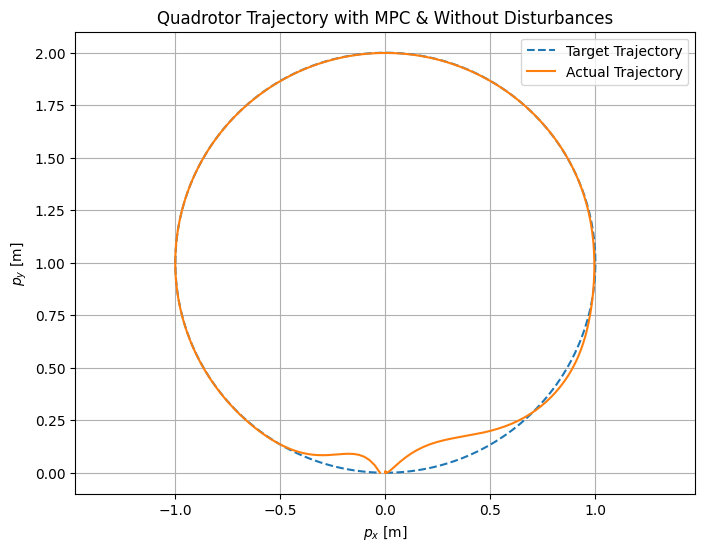

In [56]:
# Extract positions
px_sim = state_sim[0, :]
py_sim = state_sim[2, :]

# Plot the trajectory
plt.figure(figsize=(8, 6))
plt.plot(px_target[:horizon_length], py_target[:horizon_length], label='Target Trajectory', linestyle='--')
plt.plot(px_sim[:horizon_length], py_sim[:horizon_length], label='Actual Trajectory')
plt.xlabel('$p_x$ [m]')
plt.ylabel('$p_y$ [m]')
plt.title('Quadrotor Trajectory with MPC & Without Disturbances')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

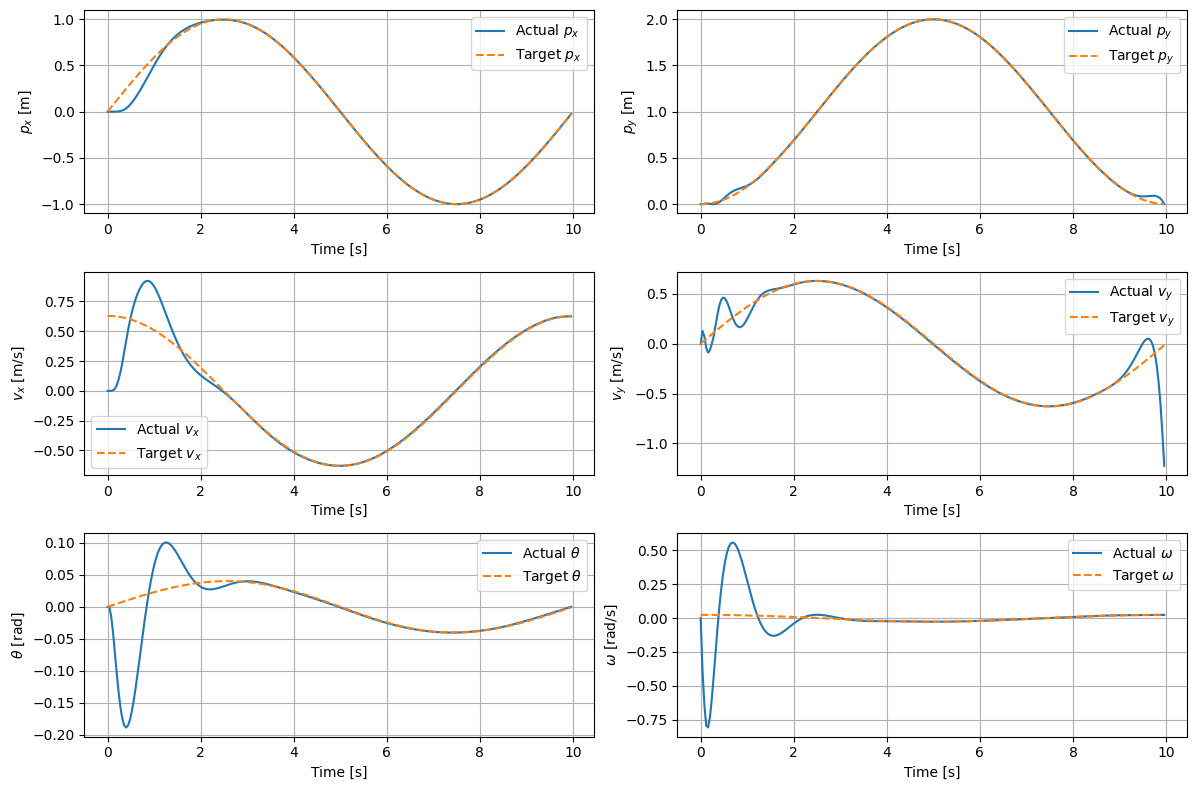

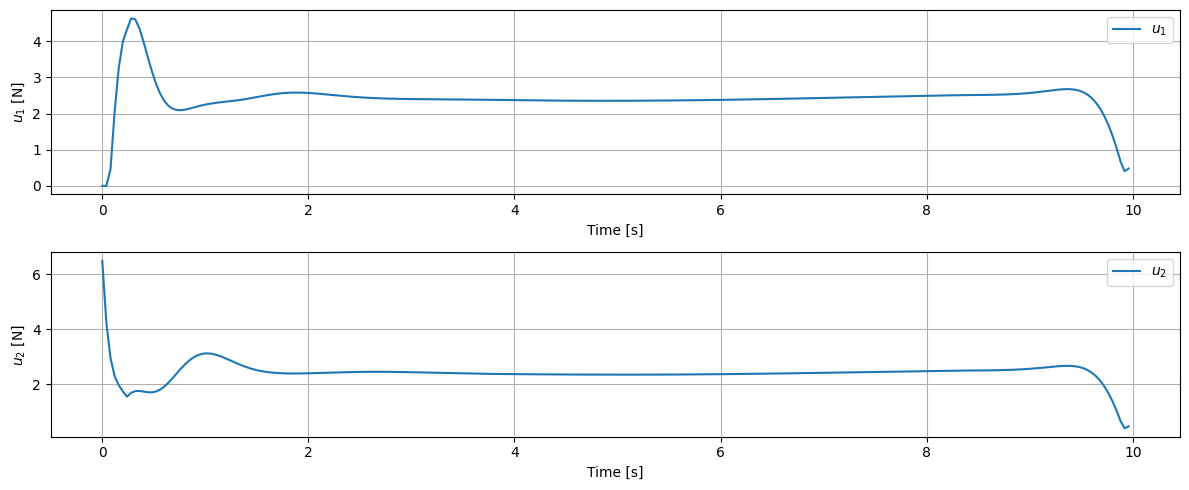

In [57]:
# Time vector
time_sim = t_sim

plt.figure(figsize=(12, 8))

# Position x
plt.subplot(3, 2, 1)
plt.plot(time_sim[:horizon_length], state_sim[0, :horizon_length], label='Actual $p_x$')
plt.plot(t[:horizon_length], px_target[:horizon_length], label='Target $p_x$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$p_x$ [m]')
plt.legend()
plt.grid()

# Position y
plt.subplot(3, 2, 2)
plt.plot(time_sim[:horizon_length], state_sim[2, :horizon_length], label='Actual $p_y$')
plt.plot(t[:horizon_length], py_target[:horizon_length], label='Target $p_y$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$p_y$ [m]')
plt.legend()
plt.grid()

# Velocity x
plt.subplot(3, 2, 3)
plt.plot(time_sim[:horizon_length], state_sim[1, :horizon_length], label='Actual $v_x$')
plt.plot(t[:horizon_length], vx_target[:horizon_length], label='Target $v_x$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$v_x$ [m/s]')
plt.legend()
plt.grid()

# Velocity y
plt.subplot(3, 2, 4)
plt.plot(time_sim[:horizon_length], state_sim[3, :horizon_length], label='Actual $v_y$')
plt.plot(t[:horizon_length], vy_target[:horizon_length], label='Target $v_y$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$v_y$ [m/s]')
plt.legend()
plt.grid()

# Theta (orientation)
plt.subplot(3, 2, 5)
plt.plot(time_sim[:horizon_length], state_sim[4, :horizon_length], label='Actual $\\theta$')
plt.plot(t[:horizon_length], theta_target[:horizon_length], label='Target $\\theta$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$\\theta$ [rad]')
plt.legend()
plt.grid()

# Omega (angular velocity)
plt.subplot(3, 2, 6)
plt.plot(time_sim[:horizon_length], state_sim[5, :horizon_length], label='Actual $\\omega$')
plt.plot(t[:horizon_length], omega_target[:horizon_length], label='Target $\\omega$', linestyle='--')
plt.xlabel('Time [s]')
plt.ylabel('$\\omega$ [rad/s]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Control inputs over time
time_controls = time_sim[:-1]

plt.figure(figsize=(12, 5))

# Rotor thrust u1
plt.subplot(2, 1, 1)
plt.plot(time_controls[:horizon_length], u_sim[0, :horizon_length], label='$u_1$')
plt.xlabel('Time [s]')
plt.ylabel('$u_1$ [N]')
plt.legend()
plt.grid()

# Rotor thrust u2
plt.subplot(2, 1, 2)
plt.plot(time_controls[:horizon_length], u_sim[1, :horizon_length], label='$u_2$')
plt.xlabel('Time [s]')
plt.ylabel('$u_2$ [N]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [58]:
# Animating robot for 10 sections duration
quadrotor.animate_robot(state_sim[:horizon_length], u_sim[:horizon_length])

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAmDZtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTE1
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0yNSBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
EQ9liIQAO//+906/AptFl2oDklcK9sqkJlm5UmsB8qYAAAMAAAMAAAMAABH5cLAuyiEuZJAAAAMA
EzAC3gGqAVYBhT85A0T90eABESP3ATZBsfRWYYKQyH9FYaJhZgC0iWFFh63kMmX7s+0cydB2uiLg
m6NdUr25H+5q/UOrkKsunbzfT9JNmcVIqGu2KgKQ8H07JVOfCdPgyVGNKPlr+M+J41iyL+P7iLKa
LX57COL4/tZXe9o+kP3nhBzjaPp2Ye6fLqRDNKToI0+s4whCIYEU169/Sjd4xrERBBt1j/YiKoTK
XIODL7n5FHGGPl1pQ7tzPGmH3OZvOkVXv0Vj2cr8mXHFl8mMr69WUyGfZHW/f0L75r0DSWqw1h2O
vJKOpQ9P8FecMCCYNd87riOmLIicnHsBMdqrymIhd8zqTyBSQ/pHnV3umtv/f+/dadc88O/CgNgS
WqofAorM+LAmktu93aN6yZPklWeco+tiMnO/bnIj0hwZ65zjD1Usn39ub7ryrrIiSvziYtq9xvi0
R3TvRrRv1mxOOREDXkf5gu4VQJC8cMha17qTiTN8HhirVVd7fJx49q7tGP20dpE3VYns3/Vn3Qaf
fk8Qk40K877a4gJCKGibR0F+clKUU8YWj4r7jtHkBqvdT8HuUUf+2M/Tg9cFZ4KtipsUT9R8e1Ve
UJLnUdluVoTXMhVzsqlXylAN9gVw6gXCXLV/USTybfR/wxSWB9Icl+r0E9UENF6FMLfei953KJPa
SzdQJtPBf2etfyyM6GOIg7ws1/8vyRy07kftrhBzKH45LUx5j9zi9JJ/n0bLaNyZPxp9FHmYFgD0
RMgD2bDGHzsiEDrudc6dut9Iq2nH2Bokle4mEa3OfP3rMu5gO+Jfadwpg5ARtfKz5qD/VNAe0J2w
CVpe0Zp2szQD/j1WCvze+i5AD1wwIHk0RBDAh3q/tC6M2K/ljpkSftlRrgvzn9eVMponBbMeat8S
qoMcslegFuqp+eZpzblwnu/862IwS/A5oX2tlxhMkmGSF6m2t9EO0rQF+0ZFjNPLn9+pgtfLhA4C
PFt/8EVcZey7SxIajlqv496xPZWVh7439qV6l/VNZ19lhjqJR+IIfVOn6iENgPG/7MhbTe2cQ7fI
agyeRotSUpYr5c6aNxRFD0eqv8/C//MK4qlNKUddhnGntW4XsqzbiBv3A6pB54VmAZqy/liTecRp
51HWAFm2Iqn26646Frhy2l0erBq5FzYvnhDTC98452MWMIWvKXMdO9vg3DwQQ34NrBfE0MxUoCtw
vlq7G/DXUf64l/lEVEWbaNZLsCcaKB6XObVRUs74cZUZAAD4o9MAbb5ZjISxjNBbtlFmFNV5vmrD
HPcSgnCcMSxUS1p12uphAGCmpjyRkqPE/6Q/u1gAIGCQ9rKAAAADAKCNXR7nDYGJ1OsSArhtc7ZW
Y4Sh8yqJey6qLup9Sclzx/y/0qk41pUEG1gn3aitF9lKr5JXiDp5CSXz32/RGYp21jFDn1Jnj1+C
XRw+AeK/xVtzV33e4qUNDw3X0MpRoOKD9mTclTtC50QogqMbKehK4k099OTBkJ52vOl8StrUuc0g
sFQ2l348S+1+rI9f9OKYwMBnIXKxzK2oxTqM1Ic7tO/qMGw9vnODMEa268BYQT9vzbOpbpXcPwkw
9BIe47L0lRIWXgKf3n2uzF62iKvnXKML7HJalsjNCU5bKDvgrvew58fR31/3n73W7k++kDtvVv9C
/dATIPPhamN6G4BALcrcRl4W+oZ8P5xtbt5C2F0u0mddCHobdJWsKeqagHMF4rjHRZFHWSYkGhNj
7VPRs/6j8mmy/8jisiKbIgCo/cAuPWPv0/yytklg70gj1oKjKpAcLu8HYJpsUPgAAAMAAAMAADNu
PV/LtKHQ6WcAAcg3itTRR9WBx0NEbCPmEklqzhb399N2IHyM+2VhPE6CVbuOEnkCkrB/vnH24Tg4
c67R6qTTAQQoEvSxHBu3dVDodLrbuO84748Bm1c4DAvxyOeBBX/mlQfaqKz/E7YDCM3mILgUFFI6
B7Ht8ATXI+ZnLX7JrcOFhsTOGWLSyDdRd7x6L7G0W9o4j0zUXv7wzkyIOSMzuvHeyUi5UtV8Wiw8
hgi+UJ5MmKFRU5LAs7EfrXJo57SkdRJdFdIkE8/xdo3RFnMaXPwuMnftQEgHLcTddh/vklXwRh2k
VnOhCXl8KXMZVp1D1L2Zahrd3J3U65fKnSiO/lWlWSm1OqnpkmGdFVoad7r5Ihlez2W9GlVusC1i
B0YGm1v/D5NRPL161d8VZHfYBzOFeTuJzFjc2xtGDHKfaWa+n2k4x9LQdyRvjb6PUqJwE0A0F12e
Qr4B9az5OtEbIlzk1ARUVDV/8EgA1W1TO4VfmF9IcFM7J0DjPkqD152AveXpxkCGwTkAxtHELU43
KMSJzKMdlgGkxAY2cr1OtUR3kPvRjmlqdv1u9kB/p+qL7crA+rsb7WCdsNJHXn/zJvJb5qDpe6pK
oTmeh+txSBaEK9YAlKref9vCVimXvsAYv9PGjwg7wtsHykk1OmuZEsLqCatFwEV42t8CibaegAAC
hMwsmXiaV3hiY/koshYoqVxLkrZEiFPfMTHVjxCbfNt3jjoVpm7jzDeJBMgHu0gUc4WZ33a0G+se
wzRjAQp9JYZJ9aY6YieMqsUvxRq239z2x5lSAiD4s51jgjzTBhHBcj8Qk43kO5gWljhXbf3M2ZuQ
CpqJJw7vUJZlcQInWf81e+j5O+fbJ0L4veVUJGlgXjzjCNmfUjUdADsLP92PVcYG9L9I2GOvZowZ
Sa60jaJi0iIRIJl9vyIIlesWKu7WYCWXHt7P+QFEUPchYIw3fCoyxiTdV4CvsqlgkcvXQ6r3+YG7
Bcpm7vWbIu2098IHJGAoZ